「AI創薬・ケモインフォマティクス」第6回「計算機実験2」講義資料3　（講師：小寺正明）

2月19日(金)19:40～21:10

In [ ]:
!date

Wed Feb 17 05:25:14 UTC 2021


# 必要なツールのインストール

In [ ]:
# RDKit installer のインストール
!pip install git+https://github.com/maskot1977/rdkit_installer.git

# RDKitのインストール
from rdkit_installer import install
install.from_miniconda()

# Optuna のインストール
!pip install optuna

# ScikitAllStars のインストール
!pip install git+https://github.com/maskot1977/scikitallstars.git

# SHAP のインストール
# !pip install shap  # 今回は使わない

# UMAP のインストール
!pip3 install umap-learn

# mordredのインストール
!pip install mordred

  Cloning https://github.com/maskot1977/rdkit_installer.git to /tmp/pip-req-build-puhkuorr
  Running command git clone -q https://github.com/maskot1977/rdkit_installer.git /tmp/pip-req-build-puhkuorr
  Created wheel for rdkit-installer: filename=rdkit_installer-0.1.0-cp36-none-any.whl size=4522 sha256=0c1d9bd02d2f0fa8adecf6cd727e1cbe40eafaf17c12758c8e4ebffbafc152d3
  Stored in directory: /tmp/pip-ephem-wheel-cache-2is94g02/wheels/22/35/68/f3dcba76a2c9080c925b783ddf87a69f63521e0378721aec73
Successfully built rdkit-installer


add /root/miniconda/lib/python3.6/site-packages to PYTHONPATH
python version: 3.6.9
fetching installer from https://repo.continuum.io/miniconda/Miniconda3-4.7.12-Linux-x86_64.sh
done
installing miniconda to /root/miniconda
done
installing rdkit
done
rdkit-2020.03.3 installation finished!


     |████████████████████████████████| 296kB 6.8MB/s 
     |████████████████████████████████| 1.1MB 11.6MB/s 
     |████████████████████████████████| 81kB 10.0MB/s 
     |████████████████████████████████| 481kB 16.3MB/s 
     |████████████████████████████████| 112kB 36.3MB/s 
     |████████████████████████████████| 143kB 28.7MB/s 
     |████████████████████████████████| 51kB 8.0MB/s 
  Created wheel for alembic: filename=alembic-1.5.4-py2.py3-none-any.whl size=156314 sha256=db690ca308b751f32f9761dddca918b026d3eb62810cc4f4996cb4533a3663cb
  Stored in directory: /root/.cache/pip/wheels/fd/2d/ec/5a1b1e2363ed68392d292d215facf588d5448198edd8078bc1
  Created wheel for Mako: filename=Mako-1.1.4-py2.py3-none-any.whl size=75675 sha256=20f0a625504ea72a552e996424f2d8f61e15ffb438b428bffac8babfa55f0a10
  Stored in directory: /root/.cache/pip/wheels/ad/10/d3/aeb26e20d19045e2a68e5d3cbb57432e11b5d9c92c99f98d47
  Created wheel for pyperclip: filename=pyperclip-1.8.1-cp36-none-any.whl size=11120 sha256

In [ ]:
!date

Thu Feb 18 02:37:58 UTC 2021


# 化合物データのダウンロード

In [ ]:
import urllib.request

# 化合物データのダウンロード
url = "https://raw.githubusercontent.com/maskot1977/tmd2020/main/data/data_1.csv"
urllib.request.urlretrieve(url, url.split("/")[-1])

('data_1.csv', <http.client.HTTPMessage at 0x7fe11b584588>)

In [ ]:
import pandas as pd

# csvからのデータ読み込み
df = pd.read_csv('data_1.csv')
df

PCCDB-ID  ... Melting point
0       15493  ...         43.79
1       20139  ...         40.29
2        7039  ...         95.04
3       18597  ...         51.64
4       23204  ...         44.94
..        ...  ...           ...
628     12787  ...        171.05
629      3840  ...        101.42
630       675  ...        120.11
631     18598  ...         51.64
632     36911  ...        101.95

[633 rows x 20 columns]

In [ ]:
!date

Thu Feb 18 02:37:58 UTC 2021


# RDKit descriptors の計算

In [ ]:
from rdkit_installer.descriptors import calc_descriptors

rdkit_descriptors_df = calc_descriptors(df['Open Babel SMILES'])
rdkit_descriptors_df

MaxEStateIndex  MinEStateIndex  ...  fr_unbrch_alkane  fr_urea
0         12.203893       -0.011059  ...                 0        0
1          8.990151        0.150741  ...                 0        0
2          9.393241       -0.207824  ...                 0        0
3          9.119284        0.353611  ...                 0        0
4          2.401620        0.311389  ...                 0        0
..              ...             ...  ...               ...      ...
628        8.990463       -0.446481  ...                 0        0
629       10.577593       -0.546019  ...                 0        0
630        4.165093        1.049167  ...                 0        0
631        9.567963        0.398056  ...                 0        0
632       10.518632       -0.384815  ...                 0        0

[633 rows x 200 columns]

# Mordred descriptors の計算

In [ ]:
from rdkit import Chem
from mordred import Calculator, descriptors

calc = Calculator(descriptors)
mordred_descriptors_df = calc.pandas([Chem.MolFromSmiles(smile) for smile in df['Open Babel SMILES']])
mordred_descriptors_df

100%|██████████| 633/633 [02:44<00:00,  3.85it/s]


ABC      ABCGG  nAcid  nBase  ...  Zagreb1  Zagreb2  mZagreb1  mZagreb2
0    12.555834  11.602561      0      1  ...     80.0     89.0  7.916667  3.833333
1     8.025464   7.826624      0      0  ...     52.0     59.0  5.194444  2.555556
2     8.623181   8.454283      0      0  ...     56.0     64.0  5.444444  2.888889
3     8.134854   7.770338      0      0  ...     52.0     58.0  5.194444  2.472222
4    11.143219   9.394819      0      0  ...     70.0     74.0  6.284722  3.333333
..         ...        ...    ...    ...  ...      ...      ...       ...       ...
628   8.163363   8.029752      0      0  ...     54.0     63.0  5.805556  2.444444
629   7.249407   6.952976      0      0  ...     46.0     51.0  4.333333  2.361111
630   8.623181   8.048055      0      0  ...     58.0     68.0  3.694444  2.388889
631   8.094413   7.861189      0      0  ...     52.0     59.0  5.194444  2.500000
632   8.910910   8.632017      0      0  ...     58.0     66.0  6.055556  2.666667

[633 rows x 1826 columns]

# 各種 Fingerprint の計算

In [ ]:
from rdkit_installer.fingerprints import Fingerprinter

fingerprinter = Fingerprinter()
fingerprinter.names()

['MACCSkeys',
 'Avalon',
 'Morgan2(1024bits)',
 'Morgan2F(1024bits)',
 'Morgan4(2048bits)',
 'Morgan4F(2048bits)',
 'ECFP2',
 'FCFP2',
 'ECFP4',
 'FCFP4',
 'ECFP6',
 'FCFP6']

In [ ]:
fp_type = "MACCSkeys"
matrix = []
for vec in fingerprinter.transform(df['Open Babel SMILES'][:10], fp_type=fp_type):
    matrix.append(vec)

pd.DataFrame(matrix)

0    1    2    3    4    5    6    ...  160  161  162  163  164  165  166
0    0    0    0    0    0    0    0  ...    1    1    0    0    1    1    0
1    0    0    0    0    0    0    0  ...    1    0    1    1    1    1    0
2    0    0    0    0    0    0    0  ...    1    0    1    1    1    1    0
3    0    0    0    0    0    0    0  ...    1    0    1    1    1    1    0
4    0    0    0    0    0    0    0  ...    1    0    0    0    0    1    0
5    0    0    0    0    0    0    0  ...    1    1    1    1    1    1    0
6    0    0    0    0    0    0    0  ...    1    0    1    1    1    1    0
7    0    0    0    0    0    0    0  ...    0    0    0    0    1    1    0
8    0    0    0    0    0    0    0  ...    1    1    1    1    0    1    0
9    0    0    0    0    0    0    0  ...    1    1    1    1    1    1    0

[10 rows x 167 columns]

In [ ]:
fp_type = "ECFP2"
matrix = []
for vec in fingerprinter.transform(df['Open Babel SMILES'][:10], fp_type=fp_type):
    matrix.append(vec)

pd.DataFrame(matrix, columns=fingerprinter.all_bit_info_keys[fp_type])

2076190208  2245273601  3925172229  ...  4086265842  2976033787  3777168895
0           0           0           1  ...           0           1           0
1           0           0           0  ...           1           0           0
2           0           0           0  ...           0           0           0
3           0           1           0  ...           0           0           0
4           0           0           0  ...           0           0           0
5           1           0           0  ...           1           0           0
6           0           0           0  ...           0           0           0
7           0           1           0  ...           0           1           0
8           0           0           0  ...           0           0           1
9           0           0           0  ...           0           0           0

[10 rows x 95 columns]

In [ ]:
fp_dfs = []
for name in fingerprinter.names():
    fp_df = pd.DataFrame([vec for vec in fingerprinter.transform(df['Open Babel SMILES'], fp_type=name)])
    if name in fingerprinter.all_bit_info_keys.keys():
        fp_df.columns=fingerprinter.all_bit_info_keys[name]

    print(name, fp_df.shape)
    fp_dfs.append(fp_df)

MACCSkeys (633, 167)
Avalon (633, 512)
Morgan2(1024bits) (633, 1024)
Morgan2F(1024bits) (633, 1024)
Morgan4(2048bits) (633, 2048)
Morgan4F(2048bits) (633, 2048)
ECFP2 (633, 693)
FCFP2 (633, 207)
ECFP4 (633, 3128)
FCFP4 (633, 1450)
ECFP6 (633, 6508)
FCFP6 (633, 4110)


In [ ]:
!date

Thu Feb 18 02:41:00 UTC 2021


# 前処理としての特徴選択と正規化

In [ ]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold() # Removing features with low variance

fp_dfs = []
for name in fingerprinter.names():
    fp_df = pd.DataFrame([vec for vec in fingerprinter.transform(df['Open Babel SMILES'], fp_type=name)])
    fp_df = pd.DataFrame(sel.fit_transform(fp_df)).apply(lambda x: (x-x.mean())/x.std(), axis=0)
    if name in fingerprinter.all_bit_info_keys.keys():
        fp_df.columns=fingerprinter.all_bit_info_keys[name]
        
    print(name, fp_df.shape)
    fp_dfs.append(fp_df)

MACCSkeys (633, 133)
Avalon (633, 511)
Morgan2(1024bits) (633, 970)
Morgan2F(1024bits) (633, 768)
Morgan4(2048bits) (633, 2002)
Morgan4F(2048bits) (633, 1912)
ECFP2 (633, 693)
FCFP2 (633, 207)
ECFP4 (633, 3128)
FCFP4 (633, 1450)
ECFP6 (633, 6508)
FCFP6 (633, 4110)


In [ ]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold() # Removing features with low variance
rdkit_descriptors_df2 = pd.DataFrame(
    sel.fit_transform(rdkit_descriptors_df), 
    columns=[rdkit_descriptors_df.columns[i] for i, var in enumerate(sel.variances_) if var != 0]
    ).apply(lambda x: (x-x.mean())/x.std(), axis=0)
rdkit_descriptors_df2

MaxEStateIndex  MinEStateIndex  ...  fr_unbrch_alkane   fr_urea
0          1.274376       -0.158629  ...         -0.092107 -0.126594
1          0.280126        0.061761  ...         -0.092107 -0.126594
2          0.404832       -0.426646  ...         -0.092107 -0.126594
3          0.320077        0.338094  ...         -0.092107 -0.126594
4         -1.758197        0.280583  ...         -0.092107 -0.126594
..              ...             ...  ...               ...       ...
628        0.280223       -0.751725  ...         -0.092107 -0.126594
629        0.771240       -0.887307  ...         -0.092107 -0.126594
630       -1.212624        1.285523  ...         -0.092107 -0.126594
631        0.458886        0.398633  ...         -0.092107 -0.126594
632        0.752999       -0.667728  ...         -0.092107 -0.126594

[633 rows x 173 columns]

In [ ]:
import numpy as np

ok_id = []
for colid, col in enumerate(mordred_descriptors_df.values.T):
    try:
        if np.var(col) != 0:
            ok_id.append(colid)
    except:
        pass

mordred_descriptors_df2 = mordred_descriptors_df.iloc[:, ok_id].apply(lambda x: (x-x.mean())/x.std(), axis=0)
mordred_descriptors_df2

ABC     ABCGG     nAcid  ...   Zagreb2  mZagreb1  mZagreb2
0    1.279317  1.381674 -0.260665  ...  0.771410  1.769327  1.306557
1   -0.922325 -0.857132 -0.260665  ... -0.852476 -0.414062 -0.789607
2   -0.631850 -0.484984 -0.260665  ... -0.581829 -0.213547 -0.242782
3   -0.869165 -0.890505 -0.260665  ... -0.906606 -0.414062 -0.926313
4    0.592823  0.072672 -0.260665  ... -0.040533  0.460407  0.486319
..        ...       ...       ...  ...       ...       ...       ...
628 -0.855310 -0.736695 -0.260665  ... -0.635958  0.076086 -0.971882
629 -1.299468 -1.375130 -0.260665  ... -1.285513 -1.104726 -1.108588
630 -0.631850 -0.725843 -0.260665  ... -0.365310 -1.617154 -1.063019
631 -0.888817 -0.836638 -0.260665  ... -0.852476 -0.414062 -0.880744
632 -0.492021 -0.379603 -0.260665  ... -0.473569  0.276602 -0.607332

[633 rows x 1096 columns]

In [ ]:
!date

Thu Feb 18 02:41:24 UTC 2021


# トレーニングデータ、テストデータへの分割

In [ ]:
import random

test_size = 0.2
ids = [id for id in range(len(df))]
random.shuffle(ids)
split_line = int(len(df) * (1 - test_size))
train_ids = ids[:split_line]
test_ids = ids[split_line:]

y_train, y_test = df.iloc[train_ids, :], df.iloc[test_ids, :]

X_trains = []
X_tests = []
for fp_df in fp_dfs:
    X_trains.append(fp_df.iloc[train_ids, :])
    X_tests.append(fp_df.iloc[test_ids, :])

X_train_rdkit, X_test_rdkit = rdkit_descriptors_df2.iloc[train_ids, :], rdkit_descriptors_df2.iloc[test_ids, :]
X_train_mordred, X_test_mordred = mordred_descriptors_df2.iloc[train_ids, :], mordred_descriptors_df2.iloc[test_ids, :]

# Objective 3 : Dipole moment

## RandomForest を用いた特徴選択

In [ ]:
import optuna
from scikitallstars import all_sklearn
from sklearn.feature_selection import SelectFromModel

def random_forest_feature_selector(X_train, y_train, X_test):
    objective = all_sklearn.Objective(X_train, y_train)
    objective.set_model_names(['RandomForest'])

    optuna.logging.set_verbosity(optuna.logging.WARN)
    study = optuna.create_study(direction='maximize')
    study.optimize(objective, timeout=100, n_trials=20, show_progress_bar=False)

    selector = SelectFromModel(estimator=objective.best_model.model).fit(X_train, y_train)

    return X_train.iloc[:, selector.get_support()], X_test.iloc[:, selector.get_support()], objective.best_model.model.feature_importances_[selector.get_support()]

In [ ]:
 X_train_rdkit1, X_test_rdkit1, feature_importance_rdkit1 = random_forest_feature_selector(X_train_rdkit, y_train['Dipole moment'], X_test_rdkit)
 print("RDKit descriptors", X_train_rdkit.shape, "->", X_train_rdkit1.shape)

RDKit descriptors (506, 173) -> (506, 36)


In [ ]:
X_train_mordred1, X_test_mordred1, feature_importance_mordred1 = random_forest_feature_selector(X_train_mordred, y_train['Dipole moment'], X_test_mordred)
print("Mordred descriptors", X_train_mordred.shape, "->", X_train_mordred1.shape)

Mordred descriptors (506, 1096) -> (506, 163)


In [ ]:
import numpy as np
import optuna
from scikitallstars import all_sklearn

def random_forest_feature_selector_fp(X_train, y_train, X_test):
    objective = all_sklearn.Objective(X_train, y_train)
    objective.set_model_names(['RandomForest'])

    optuna.logging.set_verbosity(optuna.logging.WARN)
    study = optuna.create_study(direction='maximize')
    study.optimize(objective, timeout=100, n_trials=20, show_progress_bar=False)

    selected = np.where(objective.best_model.model.feature_importances_ == 0, False, True)

    return X_train.iloc[:, selected], X_test.iloc[:, selected], objective.best_model.model.feature_importances_[selected]

In [ ]:
X_trains1_selected = []
X_tests1_selected = []
feature_importances = []
for X_train, X_test, name in zip(X_trains, X_tests, fingerprinter.names()):
    X_train1, X_test1, feature_importance = random_forest_feature_selector_fp(X_train, y_train['Dipole moment'], X_test)
    X_trains1_selected.append(X_train1)
    X_tests1_selected.append(X_test1)
    feature_importances.append(feature_importance)
    print(name, X_train.shape, "->", X_train1.shape)

MACCSkeys (506, 133) -> (506, 132)
Avalon (506, 511) -> (506, 507)
Morgan2(1024bits) (506, 970) -> (506, 909)
Morgan2F(1024bits) (506, 768) -> (506, 665)
Morgan4(2048bits) (506, 2002) -> (506, 1656)
Morgan4F(2048bits) (506, 1912) -> (506, 1547)
ECFP2 (506, 693) -> (506, 503)
FCFP2 (506, 207) -> (506, 191)
ECFP4 (506, 3128) -> (506, 2151)
FCFP4 (506, 1450) -> (506, 510)
ECFP6 (506, 6508) -> (506, 4033)
FCFP6 (506, 4110) -> (506, 2832)


RDKit descriptor (506, 36)


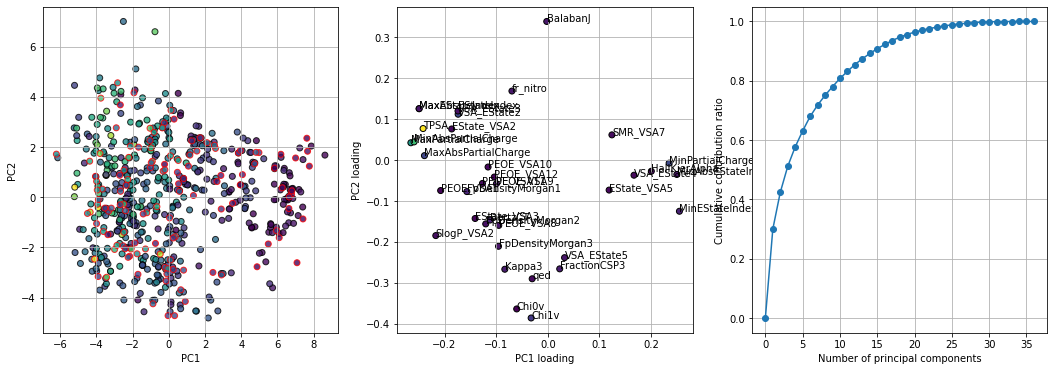

Mordred descriptor (506, 163)


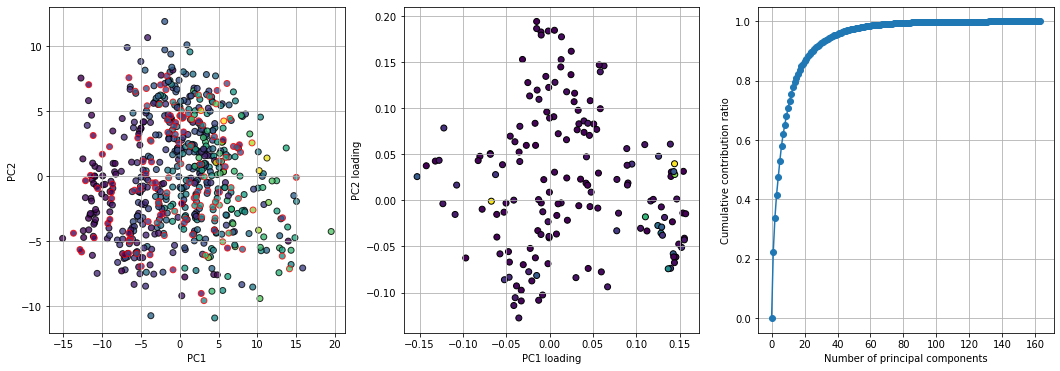

MACCSkeys (506, 132)


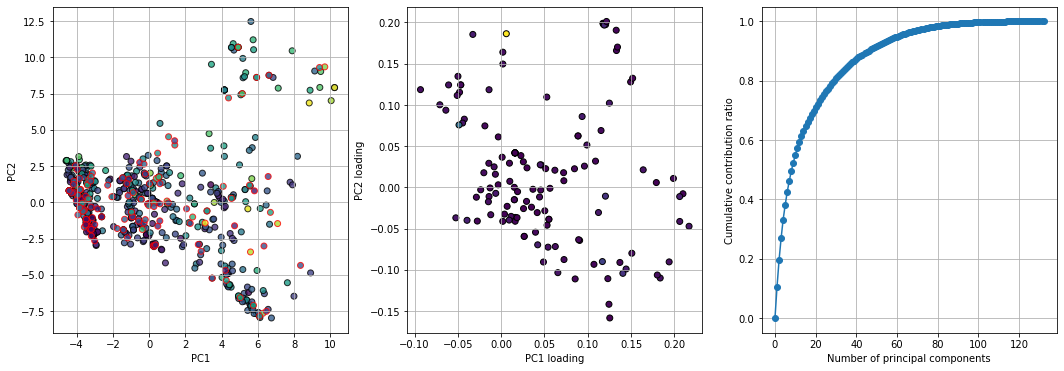

Avalon (506, 507)


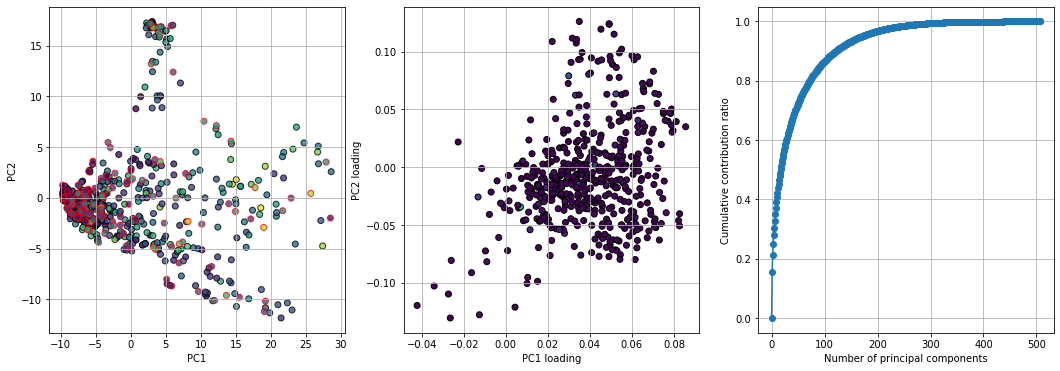

Morgan2(1024bits) (506, 909)


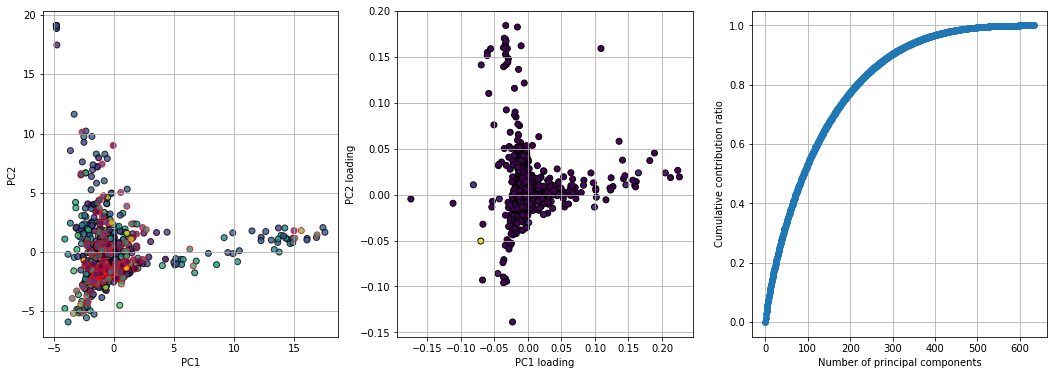

Morgan2F(1024bits) (506, 665)


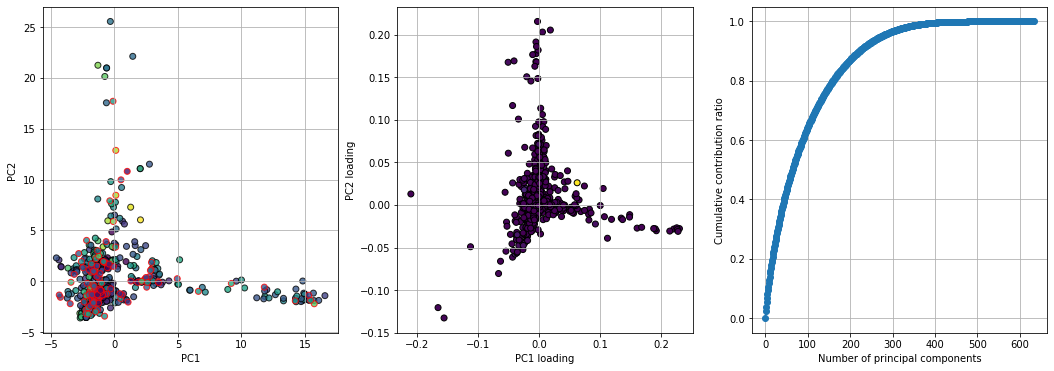

Morgan4(2048bits) (506, 1656)


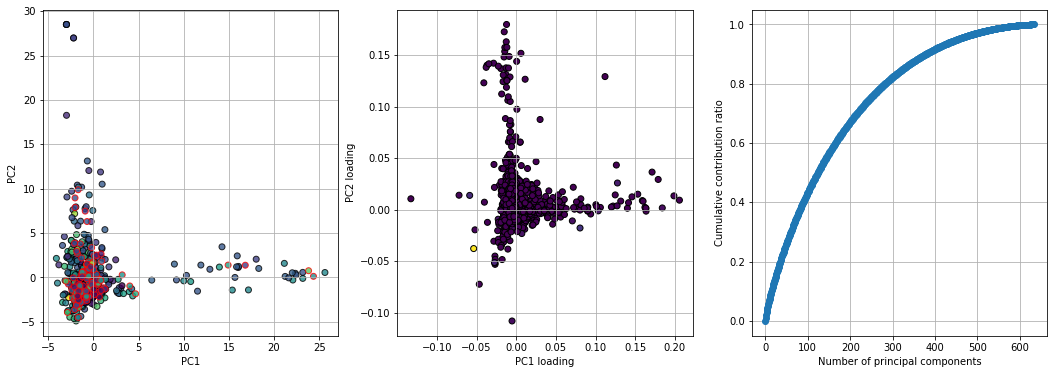

Morgan4F(2048bits) (506, 1547)


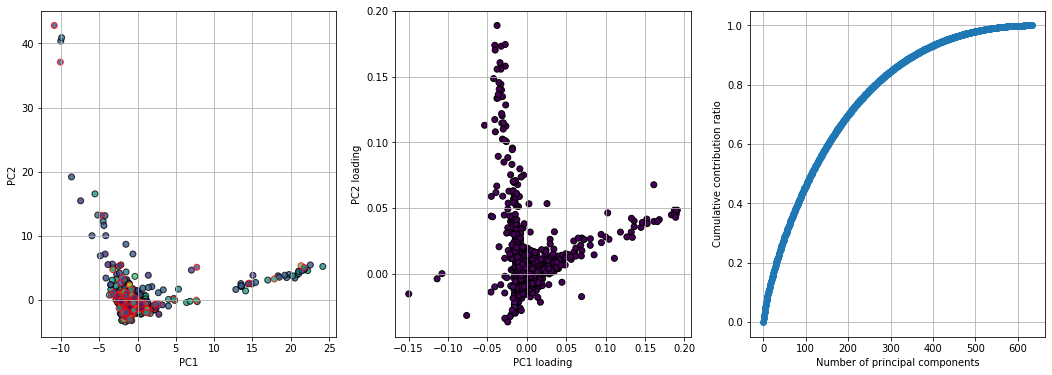

ECFP2 (506, 503)


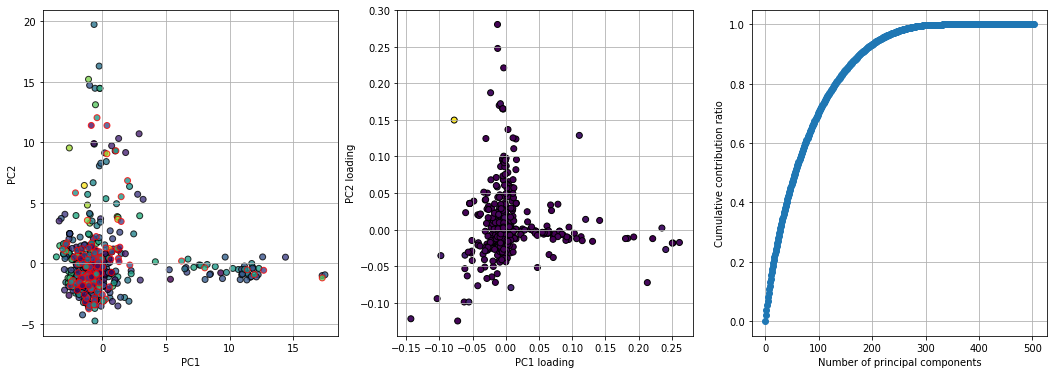

FCFP2 (506, 191)


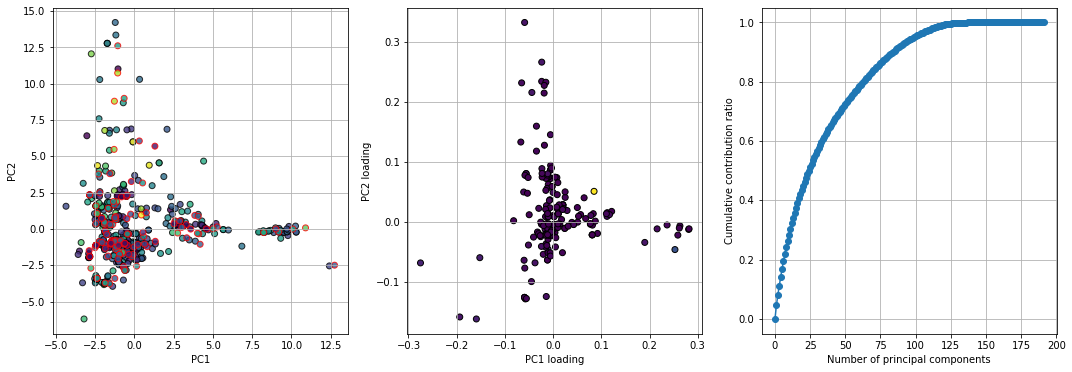

ECFP4 (506, 2151)


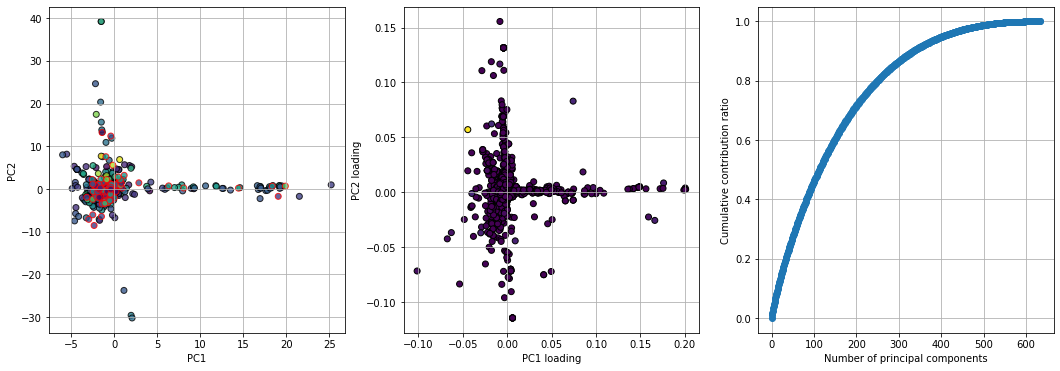

FCFP4 (506, 510)


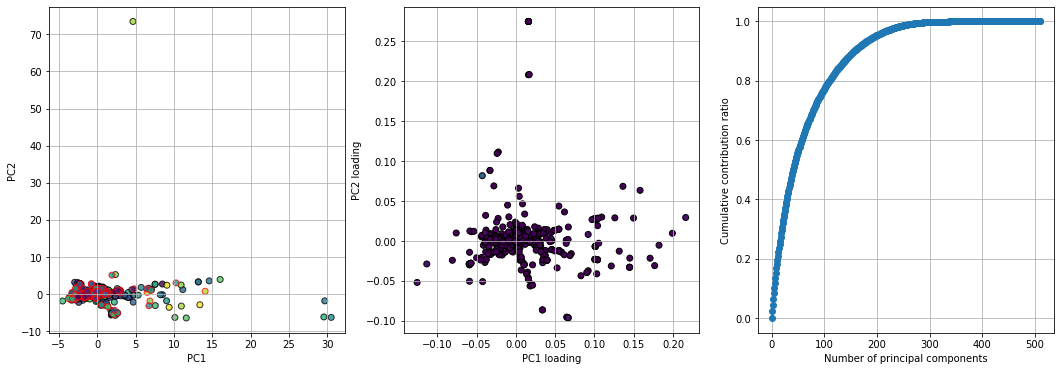

ECFP6 (506, 4033)


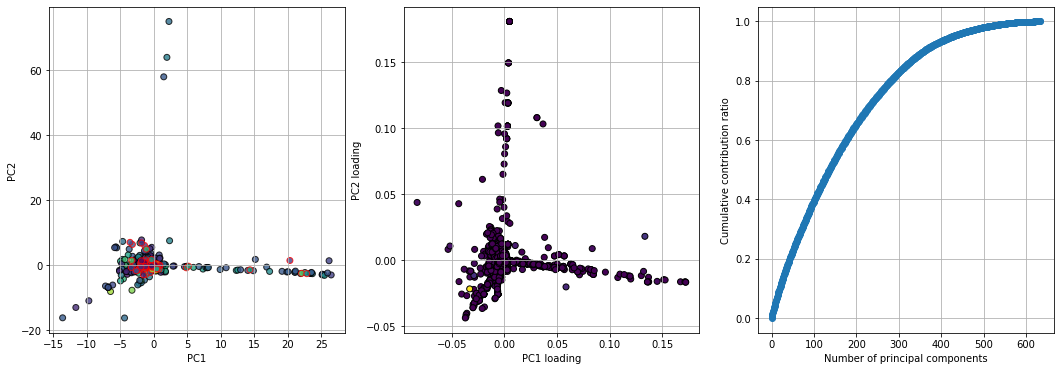

FCFP6 (506, 2832)


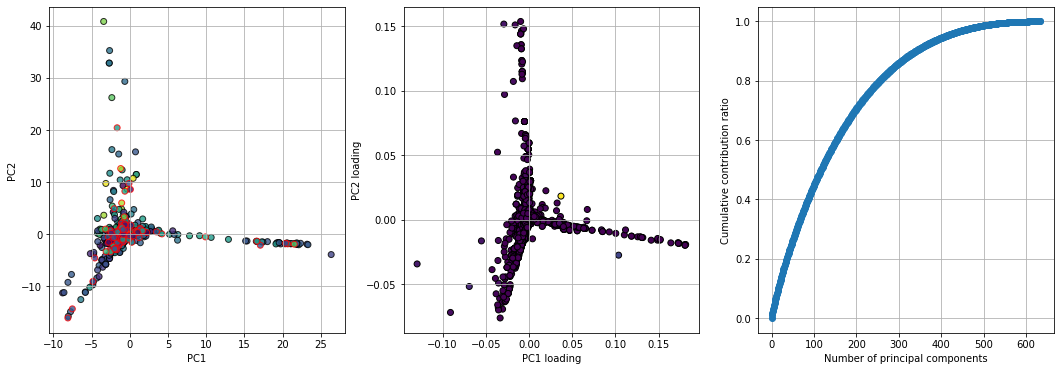

In [ ]:
pcaumap1s = []
for X_train1, X_test1, name, feature_importance in zip(
    [X_train_rdkit1, X_train_mordred1] + X_trains1_selected, 
    [X_test_rdkit1, X_test_mordred1] + X_tests1_selected, 
    ["RDKit descriptor", "Mordred descriptor"] + fingerprinter.names(),
    [feature_importance_rdkit1, feature_importance_mordred1] + feature_importances):

    print(name, X_train1.shape)
    pcaumap1 = all_sklearn.PCAUmap()
    pcaumap1.fit(pd.concat([X_train1, X_test1]))
    pcaumap1s.append(pcaumap1)
    all_sklearn.pca_summary(
        pcaumap1.pca, 
        X_train1, 
        y_train['Dipole moment'], 
        X_test1, 
        y_test=y_test['Dipole moment'],
        loading_color=feature_importance
        )

RDKit descriptors
inside function
   (0, 0)	1.0
  (0, 42)	0.32906052
  (0, 116)	0.27140924
  (0, 195)	0.22591612
  (0, 214)	0.26559013
  (0, 239)	0.34943095
  (0, 242)	0.22664747
  (0, 254)	0.24460456
  (0, 267)	0.23232502
  (0, 269)	0.38696206
  (0, 289)	0.22745118
  (0, 466)	0.22351584
  (0, 498)	0.2409973
  (0, 545)	0.22875404
  (0, 613)	0.4542268
  (1, 1)	1.0
  (1, 38)	0.2650171
  (1, 43)	0.28436723
  (1, 93)	0.2959126
  (1, 180)	0.26784542
  (1, 237)	0.32851046
  (1, 262)	0.27738482
  (1, 296)	0.26610315
  (1, 345)	0.26441005
  (1, 419)	0.27013603
  :	:
  (504, 277)	0.19318263
  (504, 327)	0.21228611
  (504, 328)	0.44361326
  (504, 335)	0.27012813
  (504, 383)	0.21110663
  (504, 439)	0.18971667
  (504, 448)	0.36463308
  (504, 504)	1.0
  (504, 605)	0.3727021
  (504, 607)	0.3765146
  (505, 10)	0.20210715
  (505, 207)	0.20854536
  (505, 222)	0.20629242
  (505, 237)	0.23775677
  (505, 262)	0.38600194
  (505, 365)	0.2569408
  (505, 388)	0.23905423
  (505, 505)	1.0
  (505, 535)	0.229537

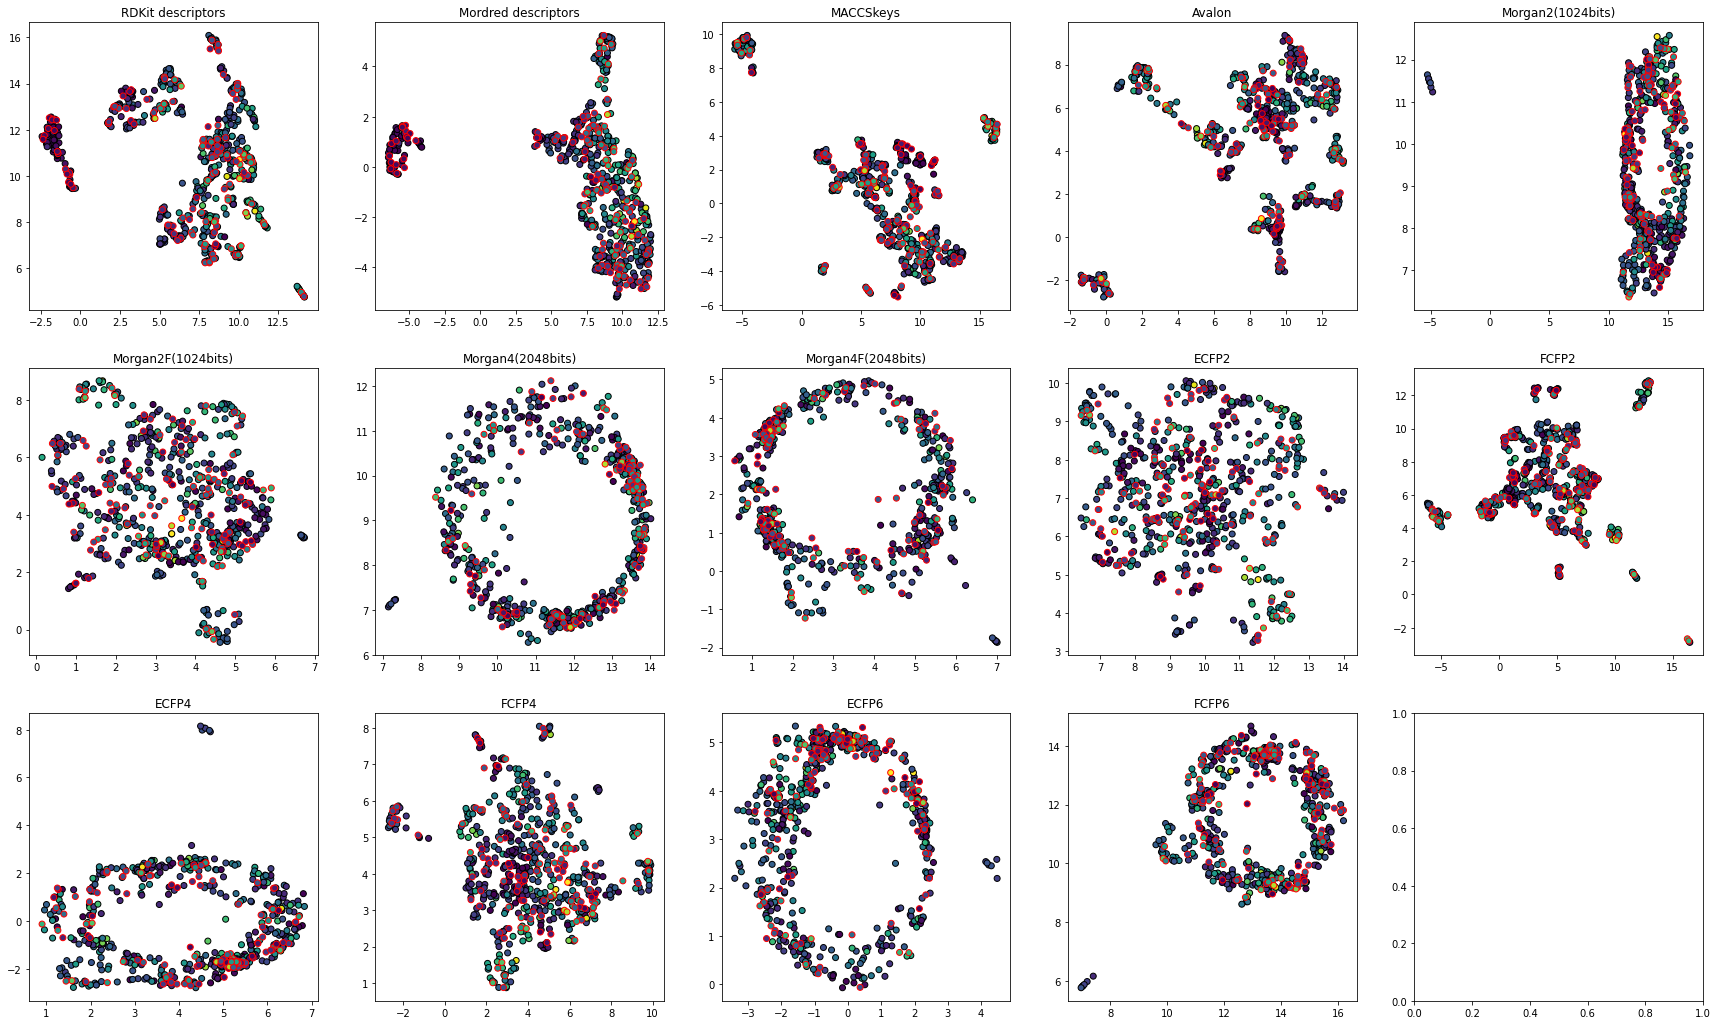

In [ ]:
import matplotlib.pyplot as plt
nrows, ncols = 3, 5
fig, axes = plt.subplots(
            nrows=nrows,
            ncols=ncols,
            figsize=(6*ncols, 6*nrows),
        )
i_ax = 0
for X_train1, X_test1, pcaumap1, name in zip(
    [X_train_rdkit1, X_train_mordred1] + X_trains1_selected, 
    [X_test_rdkit1, X_test_mordred1] + X_tests1_selected, 
    pcaumap1s, 
    ["RDKit descriptors", "Mordred descriptors"] + fingerprinter.names()
    ):
    print(name)
    embed_train1 = pcaumap1.transform(X_train1)
    embed_test1 = pcaumap1.transform(X_test1)
    axes[int(i_ax/ncols)][i_ax%ncols].set_title(name)
    axes[int(i_ax/ncols)][i_ax%ncols].scatter(embed_train1[:, 0], embed_train1[:, 1], edgecolors="k", c=y_train['Dipole moment'])
    axes[int(i_ax/ncols)][i_ax%ncols].scatter(embed_test1[:, 0], embed_test1[:, 1], edgecolors="r", c=y_test['Dipole moment'])
    i_ax += 1

plt.show()

In [ ]:
!date

Thu Feb 18 02:53:30 UTC 2021


# 選択された特徴の可視化

In [ ]:
import random
from rdkit.Chem.Draw import DrawMorganBits, IPythonConsole

def depict_fp(fp_type, fingerprinter, feature_importances, n_depict=20):
    fp_tuples = []
    legends = []
    for i in np.argsort(feature_importances[fingerprinter.names().index(fp_type)])[::-1]:
        bit = fingerprinter.all_bit_info_keys[fp_type][i]
        #print(i, feature_importances[fingerprinter.names().index(fp_type)][i], bit)

        j_index = [j for j in range(len(fingerprinter.bit_infos[fp_type]))]
        random.shuffle(j_index)
        for j in j_index:
            bit_info = fingerprinter.bit_infos[fp_type][j]
            if bit in bit_info.keys():
                fp_tuples.append((fingerprinter.mols[j], bit, bit_info))
                legends.append(str(bit))
                break

        if len(fp_tuples) >= n_depict:
            break

    return fp_tuples, legends

In [ ]:
fingerprinter.names()

['MACCSkeys',
 'Avalon',
 'Morgan2(1024bits)',
 'Morgan2F(1024bits)',
 'Morgan4(2048bits)',
 'Morgan4F(2048bits)',
 'ECFP2',
 'FCFP2',
 'ECFP4',
 'FCFP4',
 'ECFP6',
 'FCFP6']

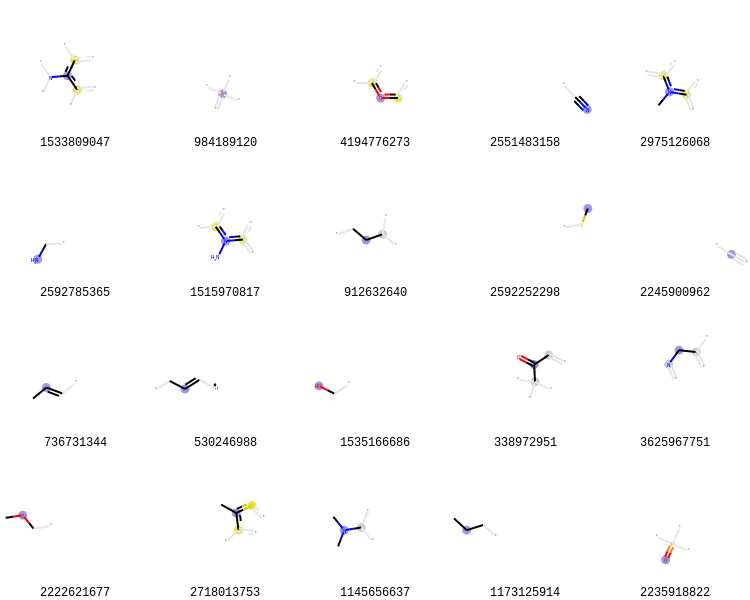

In [ ]:
fp_type = "ECFP2"
fp_tuples, legends = depict_fp(fp_type, fingerprinter, feature_importances, n_depict=20)
DrawMorganBits(fp_tuples, molsPerRow=5, legends=legends)

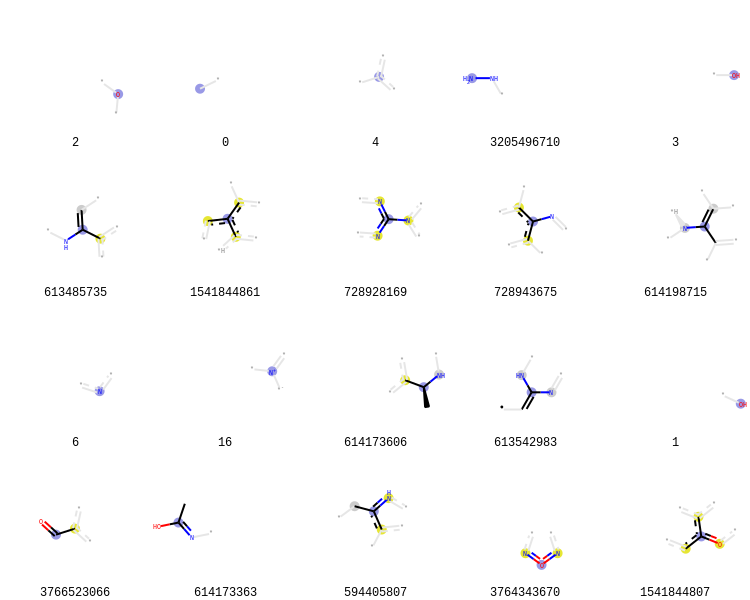

In [ ]:
fp_type = "FCFP2"
fp_tuples, legends = depict_fp(fp_type, fingerprinter, feature_importances, n_depict=20)
DrawMorganBits(fp_tuples, molsPerRow=5, legends=legends)

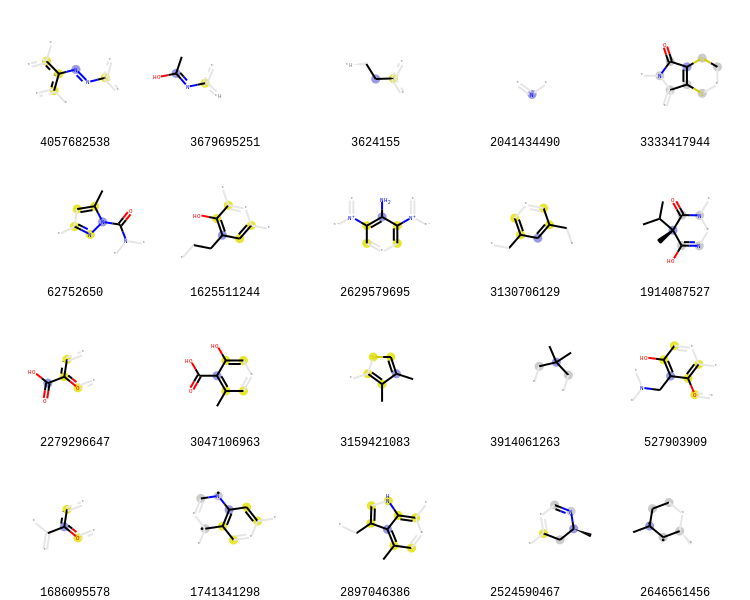

In [ ]:
fp_type = "ECFP4"
fp_tuples, legends = depict_fp(fp_type, fingerprinter, feature_importances, n_depict=20)
DrawMorganBits(fp_tuples, molsPerRow=5, legends=legends)

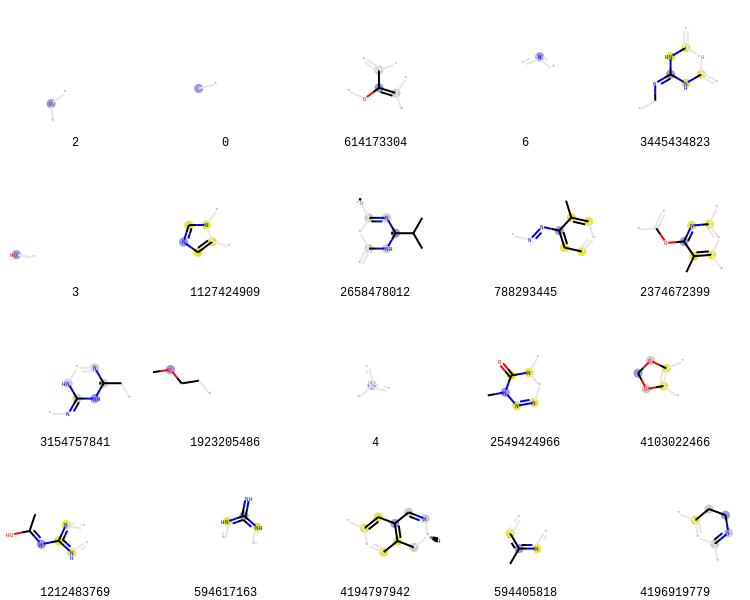

In [ ]:
fp_type = "FCFP4"
fp_tuples, legends = depict_fp(fp_type, fingerprinter, feature_importances, n_depict=20)
DrawMorganBits(fp_tuples, molsPerRow=5, legends=legends)

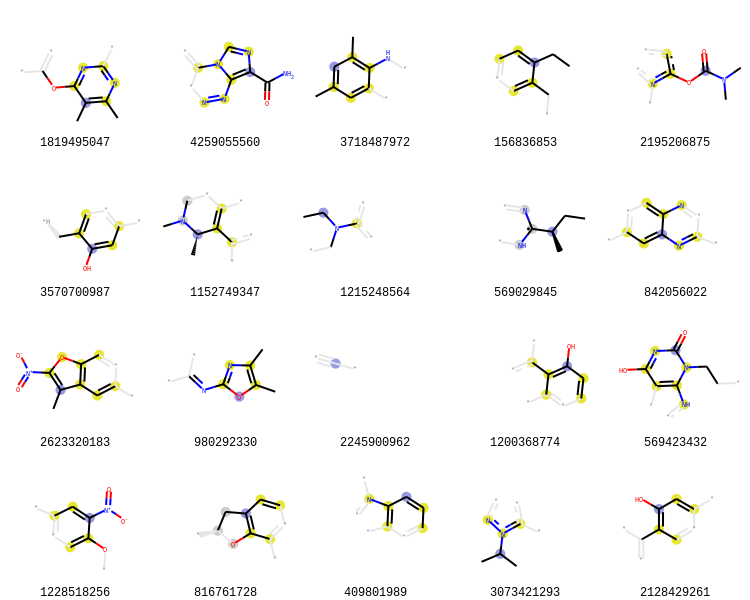

In [ ]:
fp_type = "ECFP6"
fp_tuples, legends = depict_fp(fp_type, fingerprinter, feature_importances, n_depict=20)
DrawMorganBits(fp_tuples, molsPerRow=5, legends=legends)

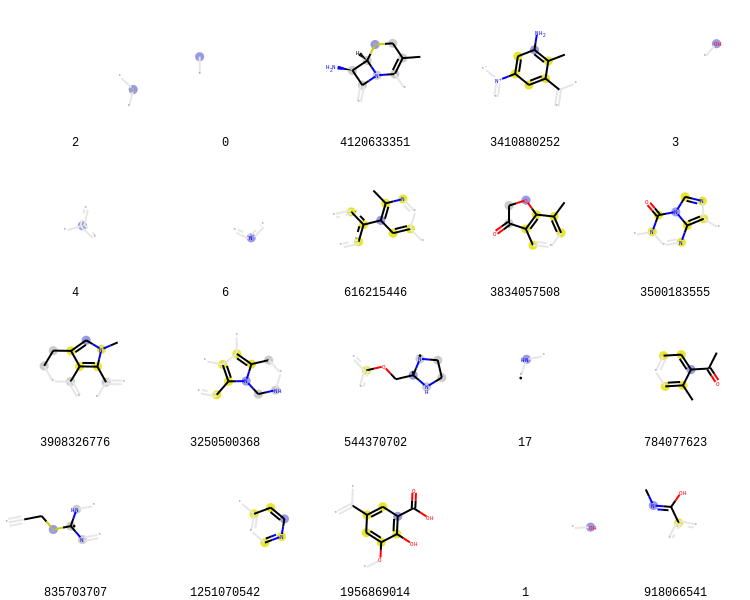

In [ ]:
fp_type = "FCFP6"
fp_tuples, legends = depict_fp(fp_type, fingerprinter, feature_importances, n_depict=20)
DrawMorganBits(fp_tuples, molsPerRow=5, legends=legends)

## 選択された特徴を用いた予測

In [ ]:
import optuna
from scikitallstars import all_sklearn
from sklearn.model_selection import train_test_split

objective1_rdkit = all_sklearn.Objective(X_train_rdkit1, y_train['Dipole moment'])

optuna.logging.set_verbosity(optuna.logging.WARN)
model_names = objective1_rdkit.get_model_names()
for model_name in model_names:
    objective1_rdkit.set_model_names([model_name])
    study1 = optuna.create_study(direction='maximize')
    study1.optimize(objective1_rdkit, timeout=100, n_trials=25, show_progress_bar=False)

objective1_rdkit.set_model_names(model_names)
#study1 = optuna.create_study(direction='maximize')
#study1.optimize(objective1_rdkit, timeout=100, n_trials=100, show_progress_bar=True)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMa

In [ ]:
import optuna
from scikitallstars import all_sklearn
from sklearn.model_selection import train_test_split

objective1_mordred = all_sklearn.Objective(X_train_mordred1, y_train['Dipole moment'])

optuna.logging.set_verbosity(optuna.logging.WARN)
model_names = objective1_mordred.get_model_names()
for model_name in model_names:
    objective1_mordred.set_model_names([model_name])
    study1 = optuna.create_study(direction='maximize')
    study1.optimize(objective1_mordred, timeout=100, n_trials=25, show_progress_bar=False)

objective1_mordred.set_model_names(model_names)
#study1 = optuna.create_study(direction='maximize')
#study1.optimize(objective1_mordred, timeout=100, n_trials=100, show_progress_bar=True)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Du

In [ ]:
import optuna
from scikitallstars import all_sklearn
from sklearn.model_selection import train_test_split

objective1s = []
for X_train1, X_test1, name in zip(X_trains1_selected, X_tests1_selected, fingerprinter.names()):
    objective1 = all_sklearn.Objective(X_train1, y_train['Dipole moment'])

    optuna.logging.set_verbosity(optuna.logging.WARN)
    model_names = objective1.get_model_names()
    for model_name in model_names:
        print(name, model_name)
        objective1.set_model_names([model_name])
        study1 = optuna.create_study(direction='maximize')
        study1.optimize(objective1, timeout=100, n_trials=25, show_progress_bar=False)

    objective1.set_model_names(model_names)
    #study1 = optuna.create_study(direction='maximize')
    #study1.optimize(objective1, timeout=100, n_trials=25, show_progress_bar=False)

    objective1s.append(objective1)

MACCSkeys GradientBoosting
MACCSkeys RandomForest
MACCSkeys MLP
MACCSkeys SVR


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



MACCSkeys kNN
MACCSkeys Ridge
MACCSkeys Lasso
MACCSkeys PLS


/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 115



MACCSkeys LinearRegression
Avalon GradientBoosting
Avalon RandomForest
Avalon MLP
Avalon SVR


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



Avalon kNN
Avalon Ridge
Avalon Lasso
'regressor.fit' terminated since it did not finish in 60 second(s).
Avalon PLS


/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 371

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 368

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 369



Avalon LinearRegression
Morgan2(1024bits) GradientBoosting
Morgan2(1024bits) RandomForest
Morgan2(1024bits) MLP
Morgan2(1024bits) SVR
Morgan2(1024bits) kNN
Morgan2(1024bits) Ridge
Morgan2(1024bits) Lasso
Morgan2(1024bits) PLS


/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 398

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 400

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 400

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 398

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 401

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 399

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 399

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarnin

Morgan2(1024bits) LinearRegression
Morgan2F(1024bits) GradientBoosting
Morgan2F(1024bits) RandomForest
Morgan2F(1024bits) MLP
Morgan2F(1024bits) SVR


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



Morgan2F(1024bits) kNN
Morgan2F(1024bits) Ridge
Morgan2F(1024bits) Lasso
Morgan2F(1024bits) PLS


/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 362

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 355

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 365

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 360



Morgan2F(1024bits) LinearRegression
Morgan4(2048bits) GradientBoosting
Morgan4(2048bits) RandomForest
Morgan4(2048bits) MLP
Morgan4(2048bits) SVR
Morgan4(2048bits) kNN
Morgan4(2048bits) Ridge
Morgan4(2048bits) Lasso
Morgan4(2048bits) PLS


/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 402

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 402

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 401

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 402

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 404

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 401

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 404

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarnin

Morgan4(2048bits) LinearRegression
Morgan4F(2048bits) GradientBoosting
Morgan4F(2048bits) RandomForest
Morgan4F(2048bits) MLP
Morgan4F(2048bits) SVR
Morgan4F(2048bits) kNN
Morgan4F(2048bits) Ridge
Morgan4F(2048bits) Lasso
Morgan4F(2048bits) PLS


/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 402

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 399

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 403

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 399

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 400

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 399

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 399

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarnin

Morgan4F(2048bits) LinearRegression
ECFP2 GradientBoosting
ECFP2 RandomForest
ECFP2 MLP
ECFP2 SVR


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



ECFP2 kNN
ECFP2 Ridge
ECFP2 Lasso
ECFP2 PLS


/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 265

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 271

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 278

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 269

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 268



ECFP2 LinearRegression
FCFP2 GradientBoosting
FCFP2 RandomForest
FCFP2 MLP
FCFP2 SVR


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



FCFP2 kNN
FCFP2 Ridge
FCFP2 Lasso
FCFP2 PLS


/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 125

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 130

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 128

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 134

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 131

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 126

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 129

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarnin

FCFP2 LinearRegression
ECFP4 GradientBoosting
ECFP4 RandomForest
ECFP4 MLP
ECFP4 SVR


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



ECFP4 kNN
ECFP4 Ridge
ECFP4 Lasso
ECFP4 PLS


/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 397

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 396

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 397

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 400

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 398

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 398

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 398

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarnin

ECFP4 LinearRegression
FCFP4 GradientBoosting
FCFP4 RandomForest
FCFP4 MLP
FCFP4 SVR


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



FCFP4 kNN
FCFP4 Ridge
FCFP4 Lasso
FCFP4 PLS


/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 296

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 309

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 310

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 303

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 300

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 302

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 299



FCFP4 LinearRegression
ECFP6 GradientBoosting
ECFP6 RandomForest
ECFP6 MLP
ECFP6 SVR
ECFP6 kNN
ECFP6 Ridge
ECFP6 Lasso
'regressor.fit' terminated since it did not finish in 60 second(s).
ECFP6 PLS


/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 402

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 401

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 401

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 403

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 402



ECFP6 LinearRegression
FCFP6 GradientBoosting
FCFP6 RandomForest
FCFP6 MLP
FCFP6 SVR


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



FCFP6 kNN
FCFP6 Ridge
FCFP6 Lasso
FCFP6 PLS


/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 398

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 398

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 396

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 397

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 401

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 398

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 397

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarnin

FCFP6 LinearRegression


RDKit descriptors


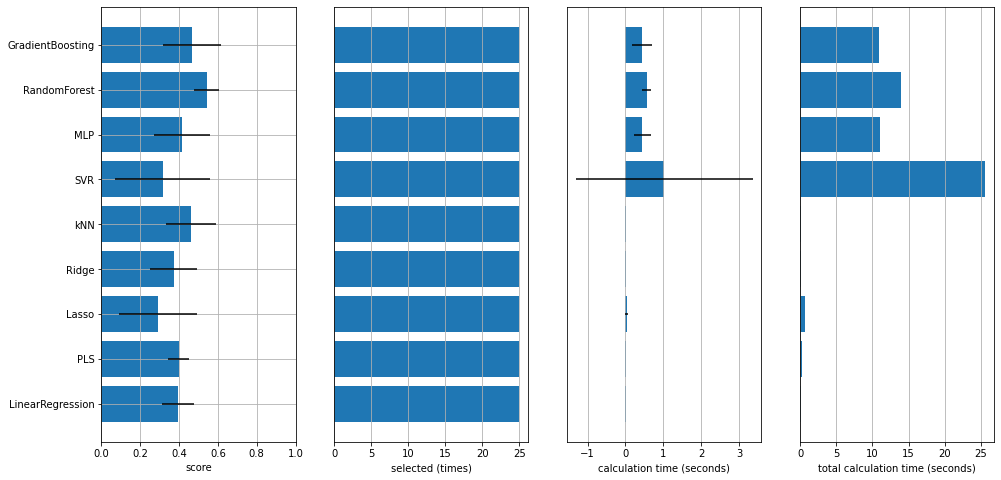

Mordred descriptors


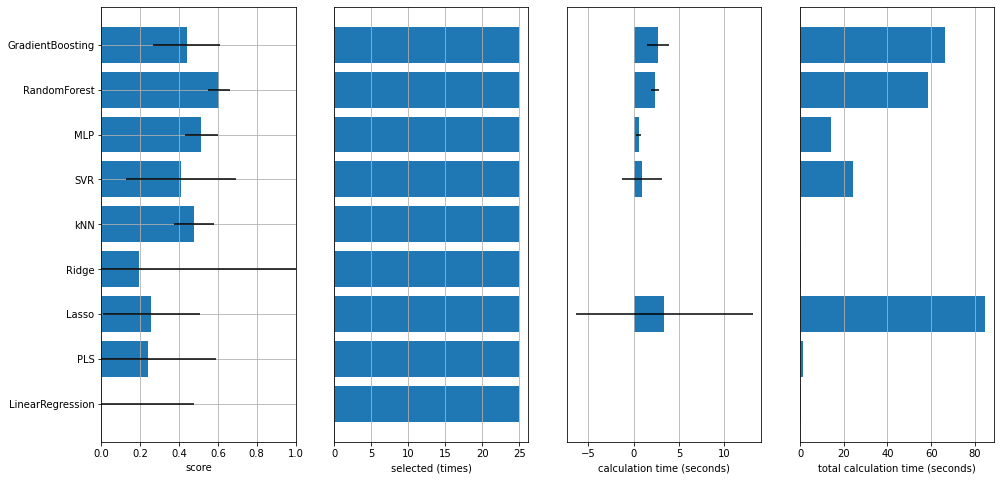

MACCSkeys


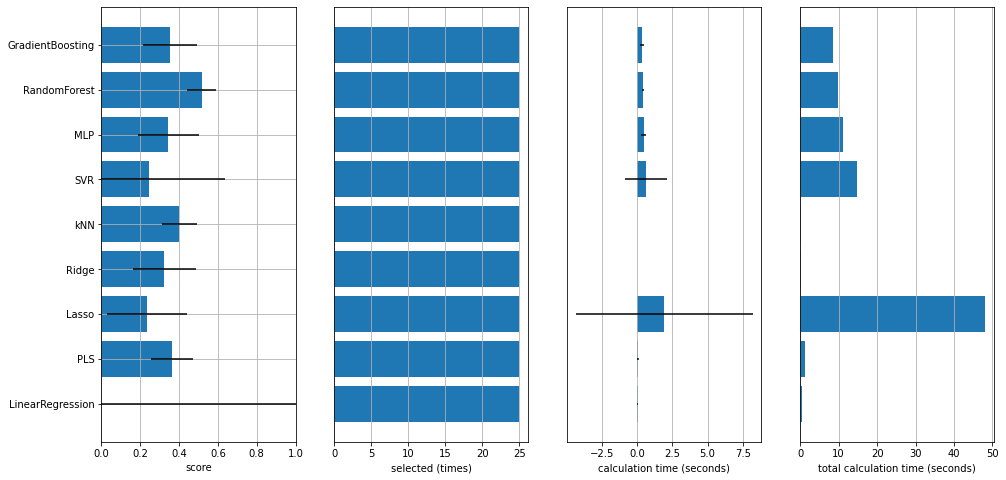

Avalon


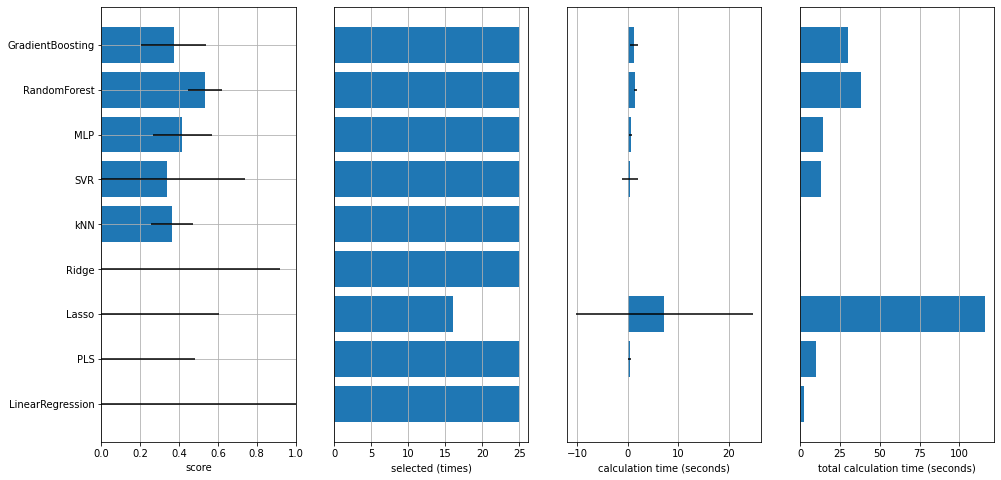

Morgan2(1024bits)


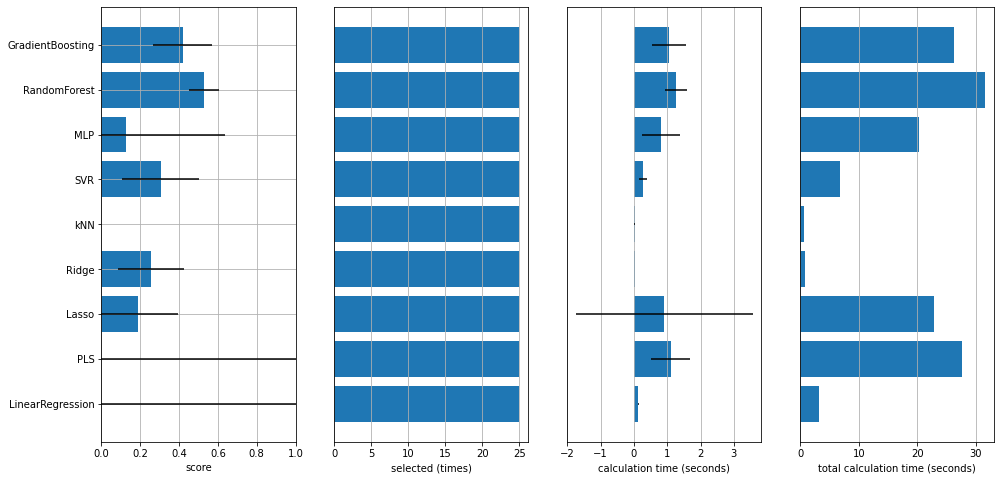

Morgan2F(1024bits)


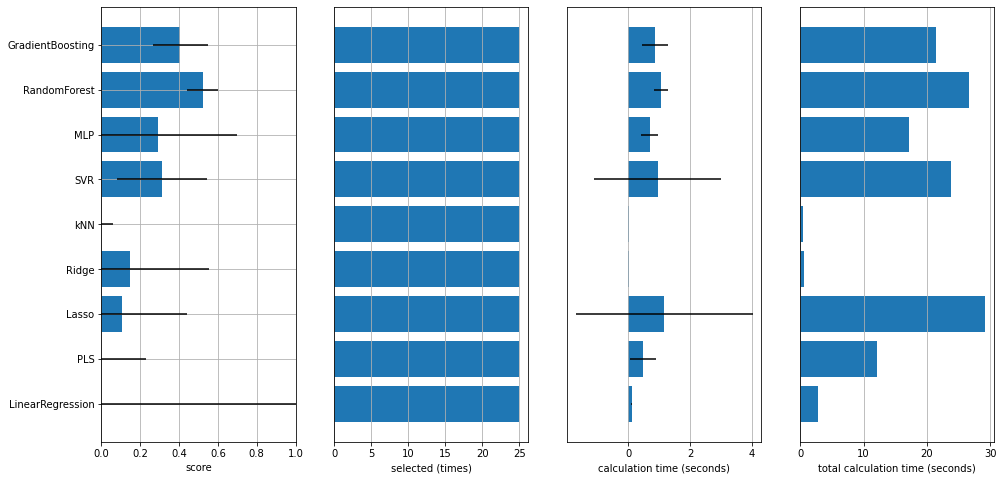

Morgan4(2048bits)


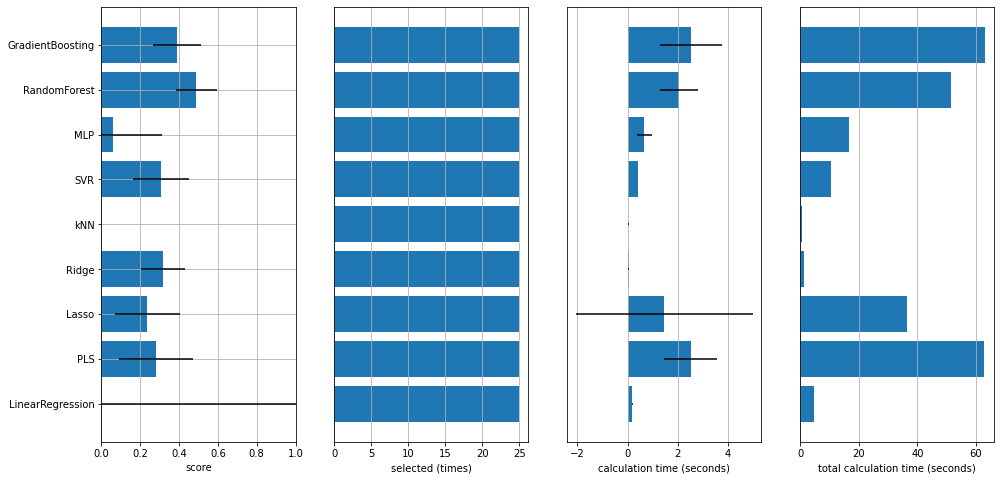

Morgan4F(2048bits)


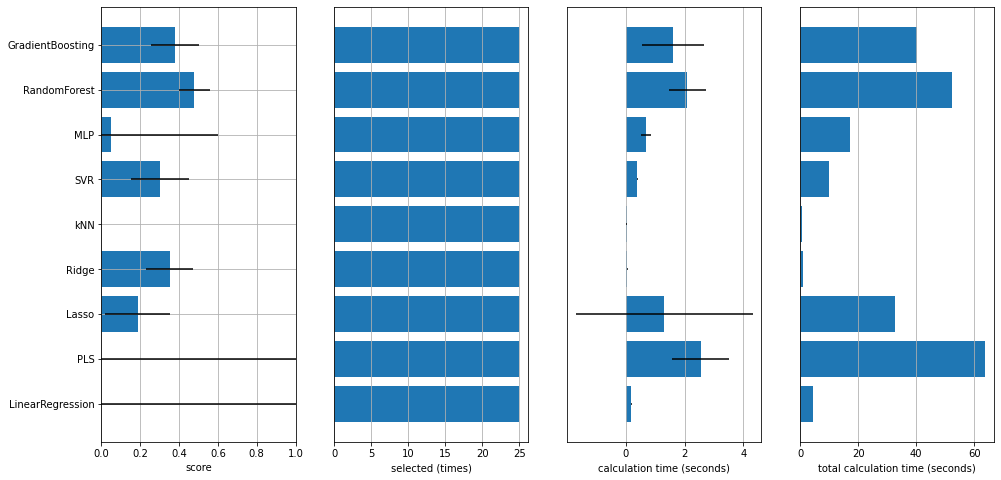

ECFP2


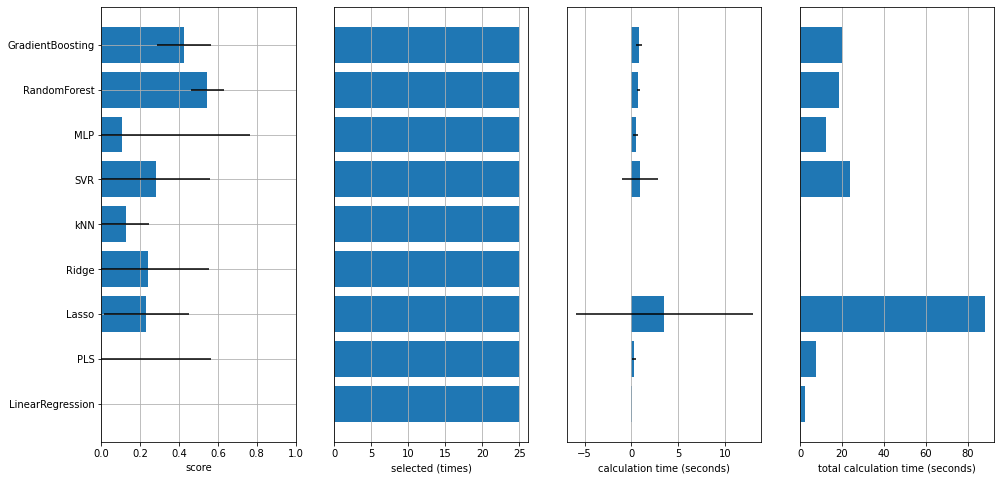

FCFP2


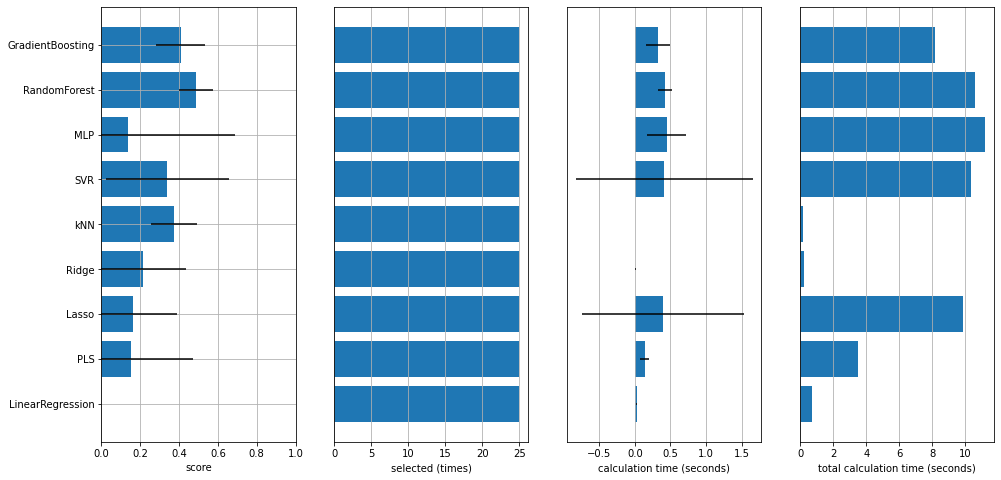

ECFP4


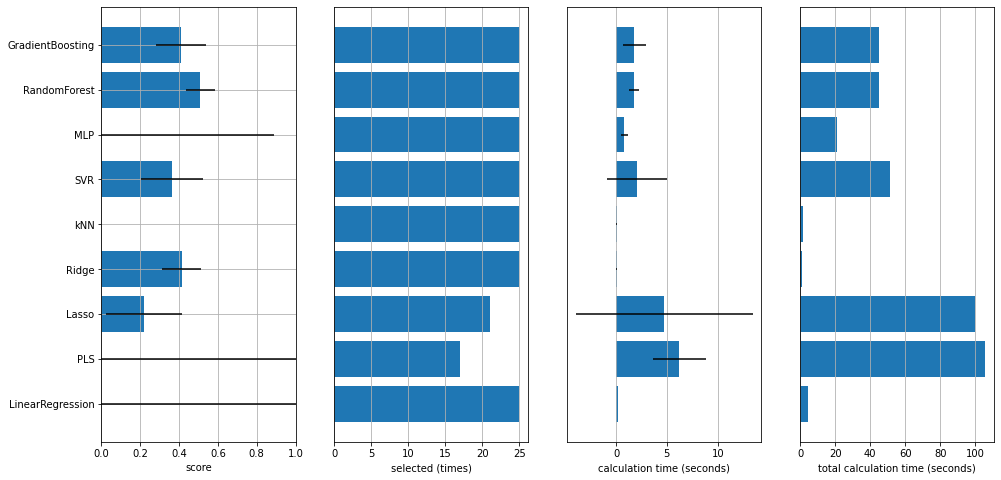

FCFP4


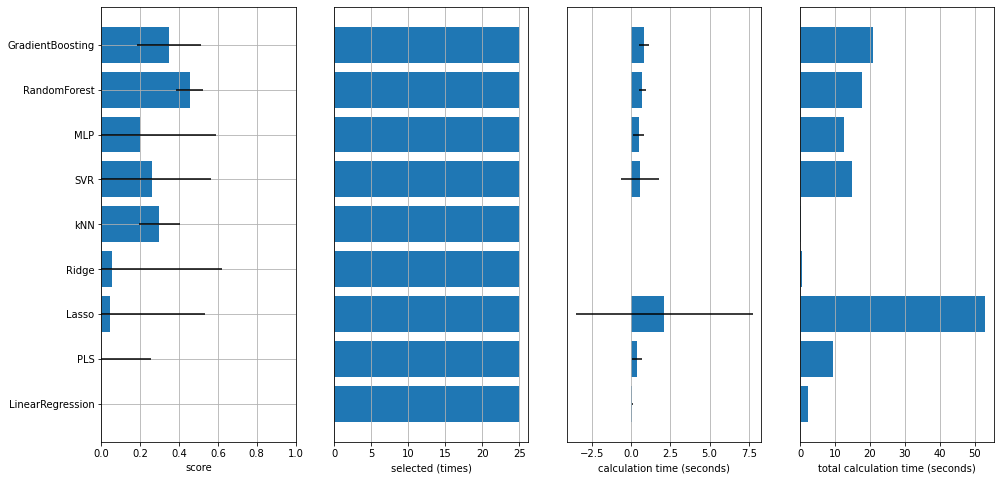

ECFP6


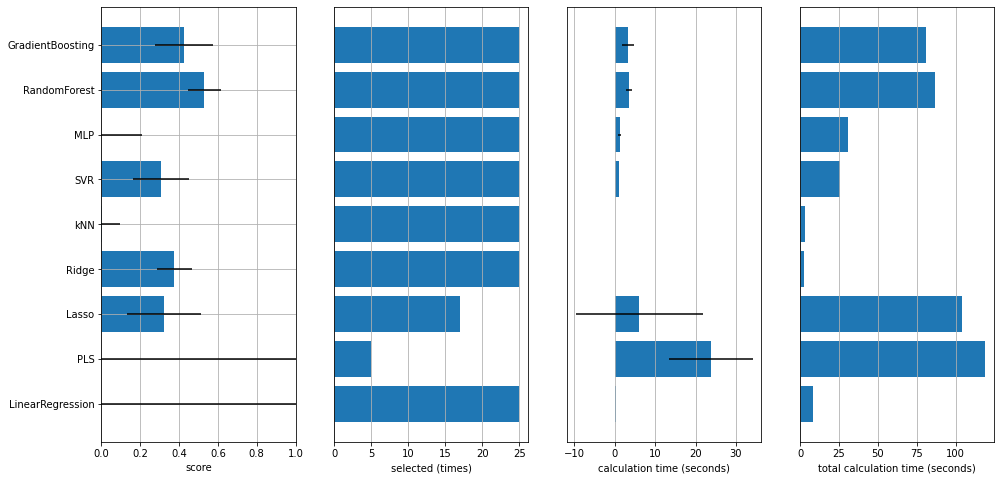

FCFP6


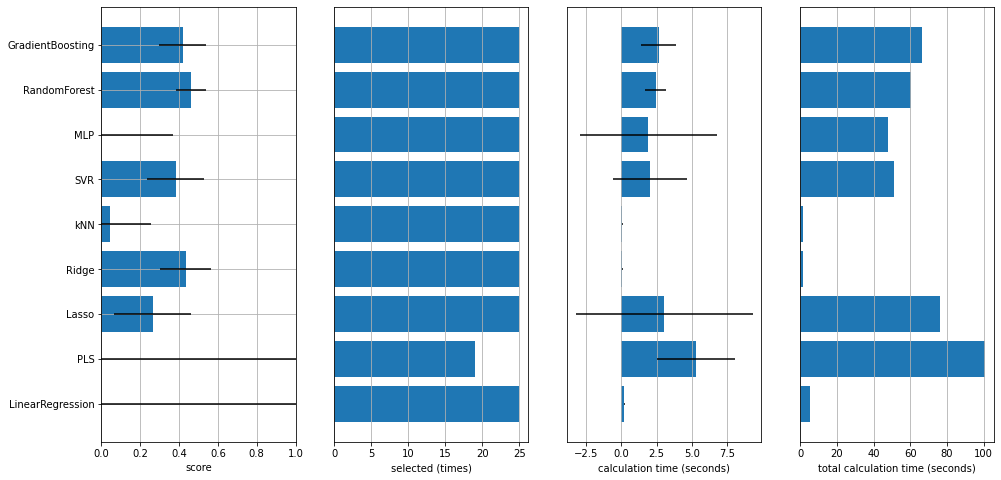

In [ ]:
for objective1, name in zip(
    [objective1_rdkit, objective1_mordred] + objective1s, 
    ["RDKit descriptors", "Mordred descriptors"] + fingerprinter.names()
    ):
    print(name)
    all_sklearn.objective_summary(objective1)

RDKit descriptors


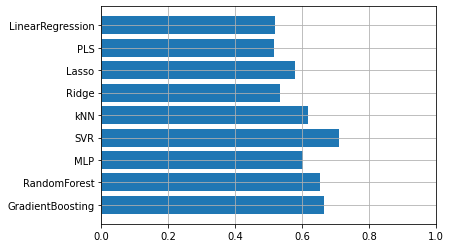

Mordred descriptors


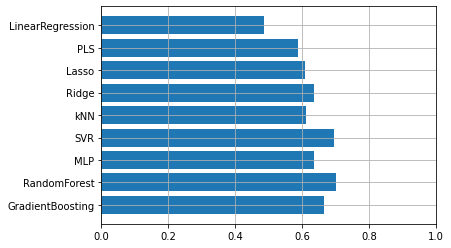

MACCSkeys


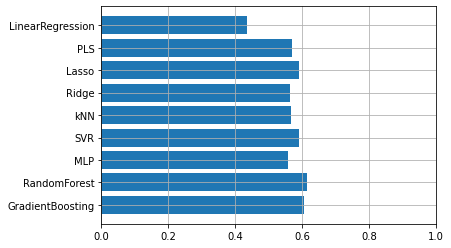

Avalon


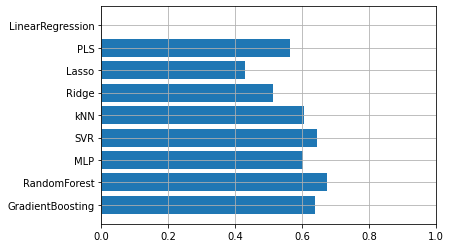

Morgan2(1024bits)


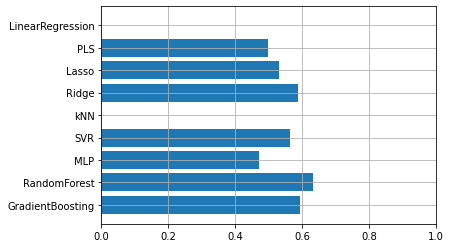

Morgan2F(1024bits)


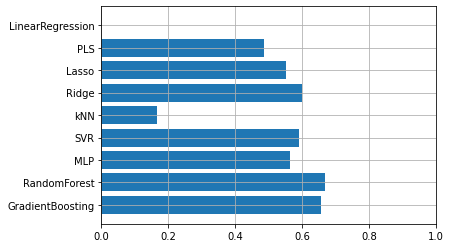

Morgan4(2048bits)


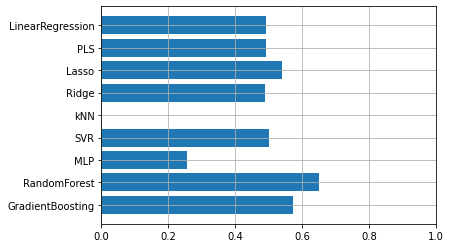

Morgan4F(2048bits)


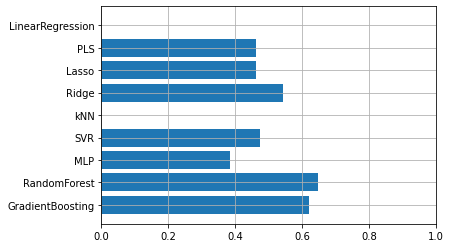

ECFP2


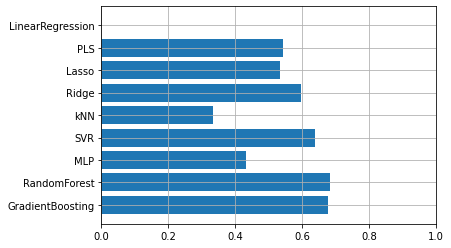

FCFP2


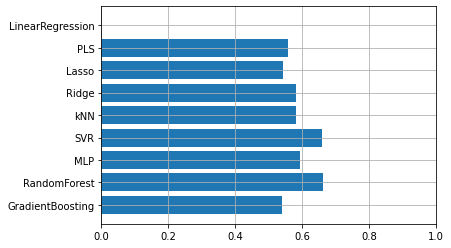

ECFP4


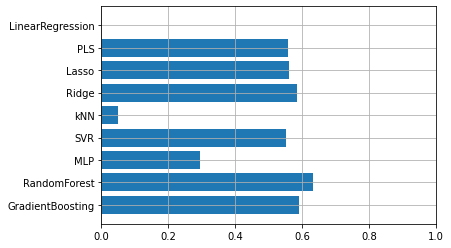

FCFP4


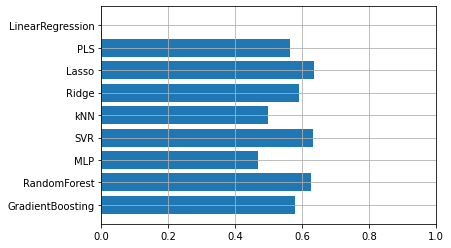

ECFP6


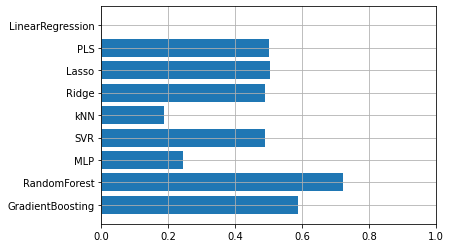

FCFP6


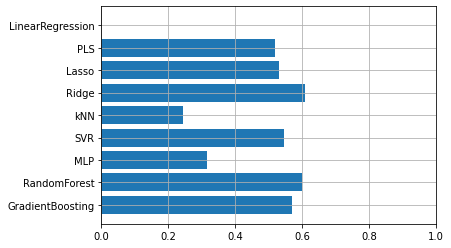

In [ ]:
import matplotlib.pyplot as plt
for objective1, name in zip(
    [objective1_rdkit, objective1_mordred] + objective1s, 
    ["RDKit descriptors", "Mordred descriptors"] + fingerprinter.names()
    ):
    print(name)
    plt.barh([x for x in range(len(objective1.best_scores.items()))], list(objective1.best_scores.values()), tick_label=list(objective1.best_scores.keys()))
    plt.xlim([0, 1])
    plt.grid()
    plt.show()

RDKit descriptors


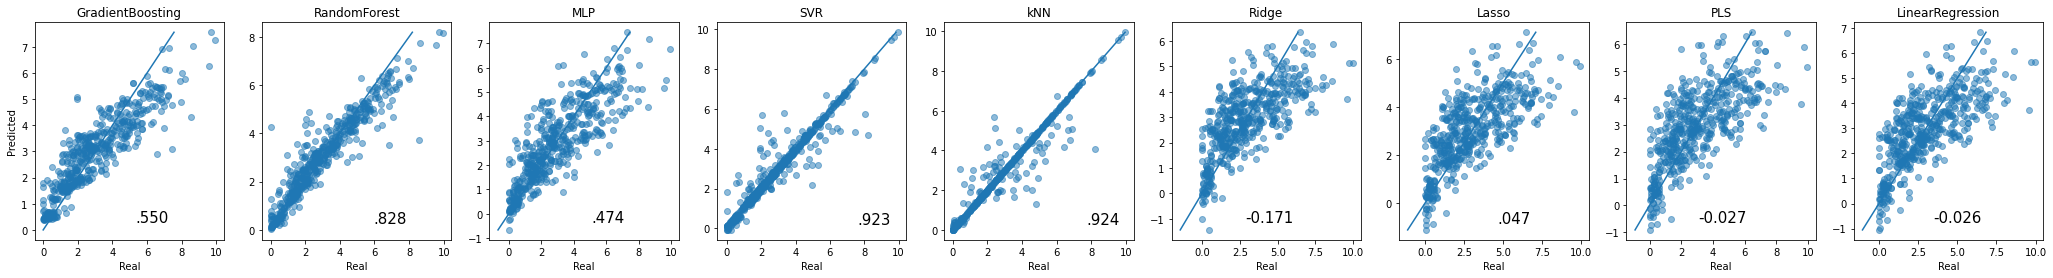

Mordred descriptors


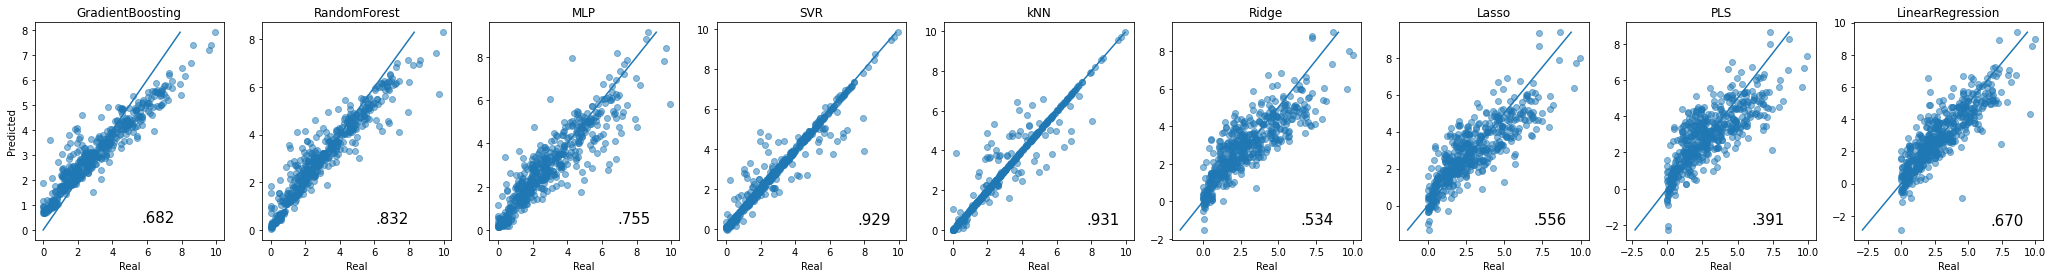

MACCSkeys


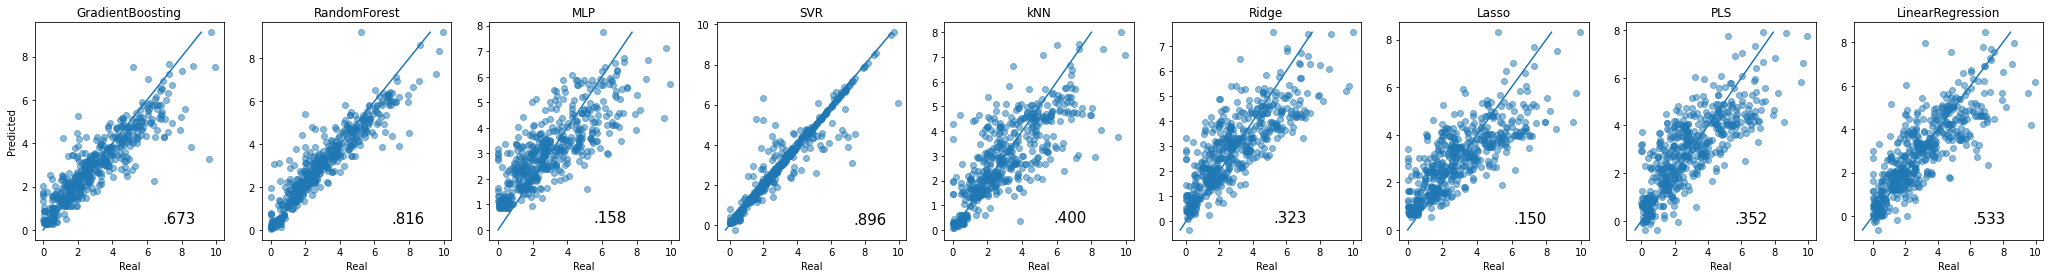

Avalon


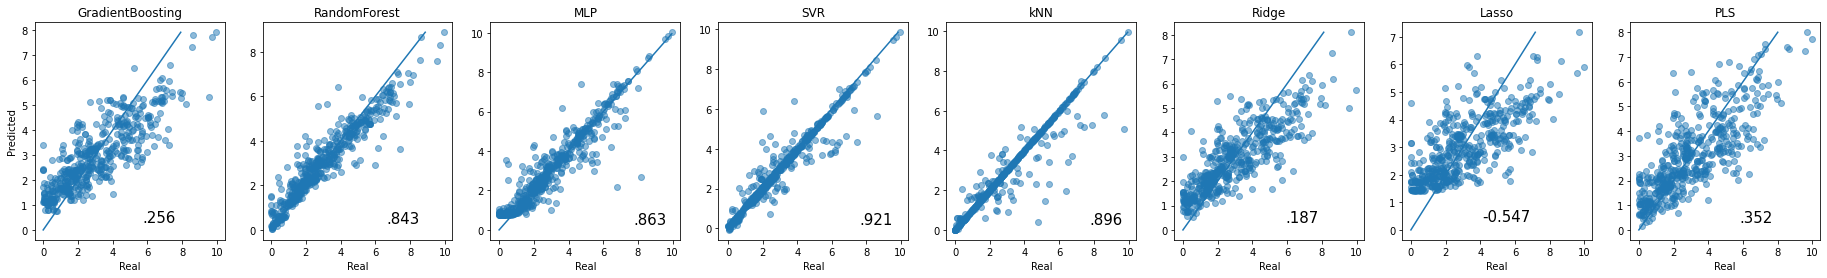

Morgan2(1024bits)


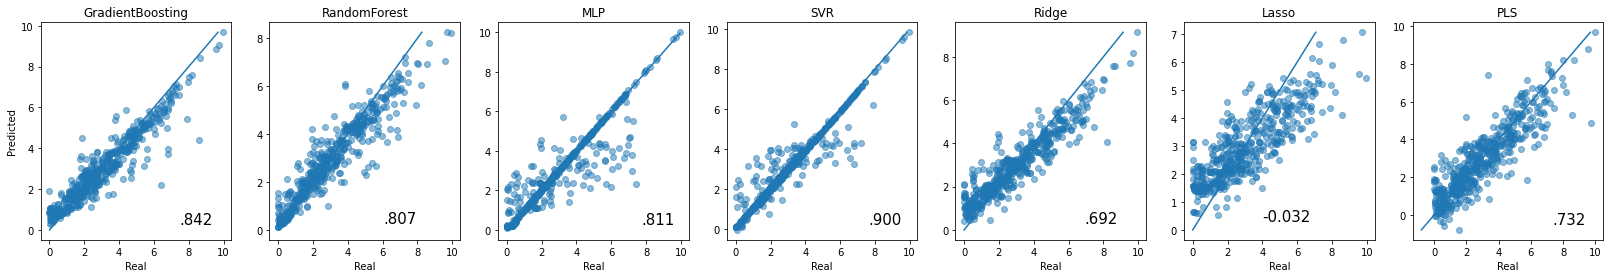

Morgan2F(1024bits)


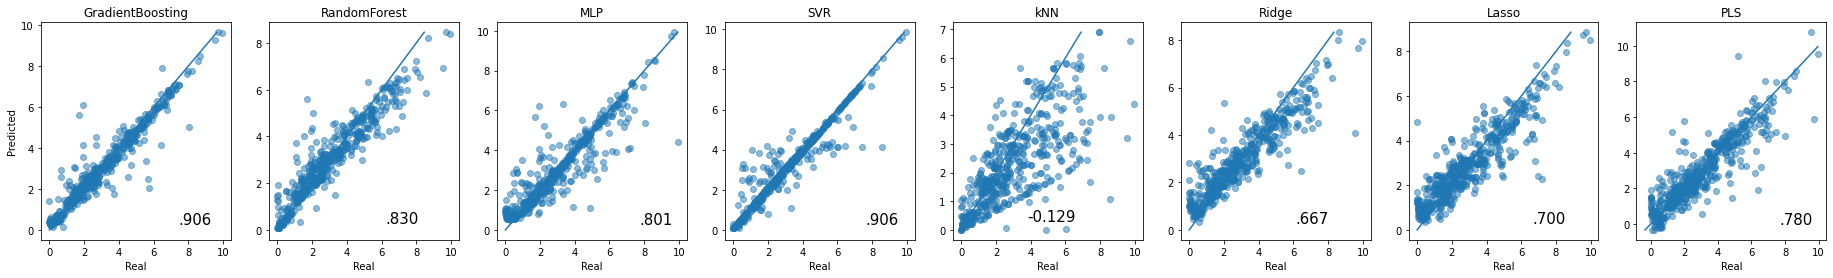

Morgan4(2048bits)


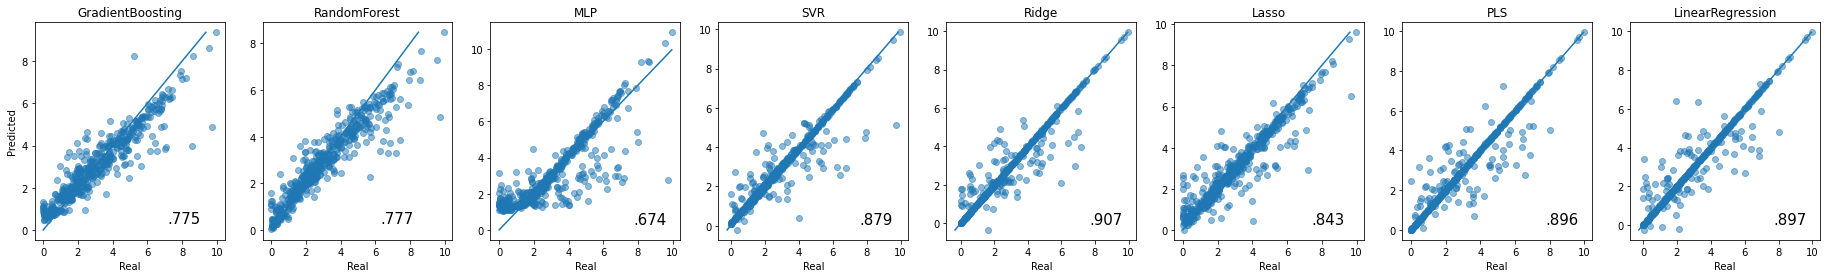

Morgan4F(2048bits)


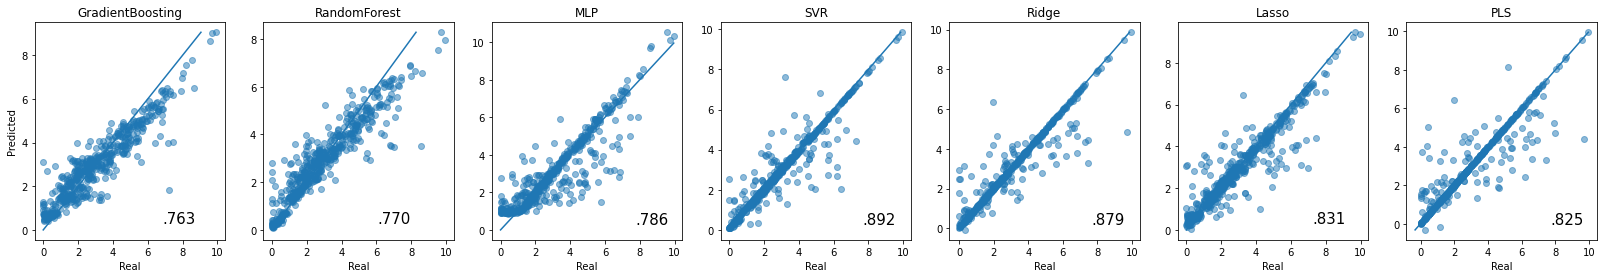

ECFP2


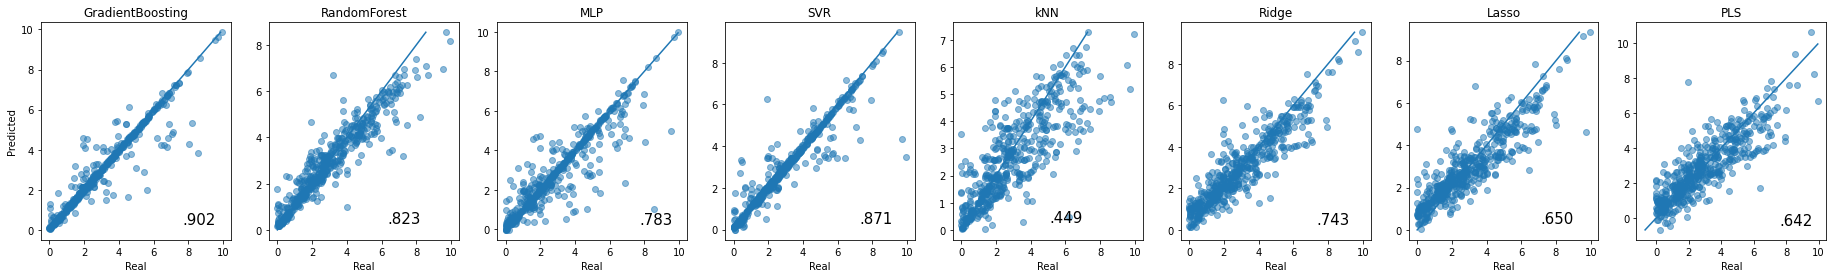

FCFP2


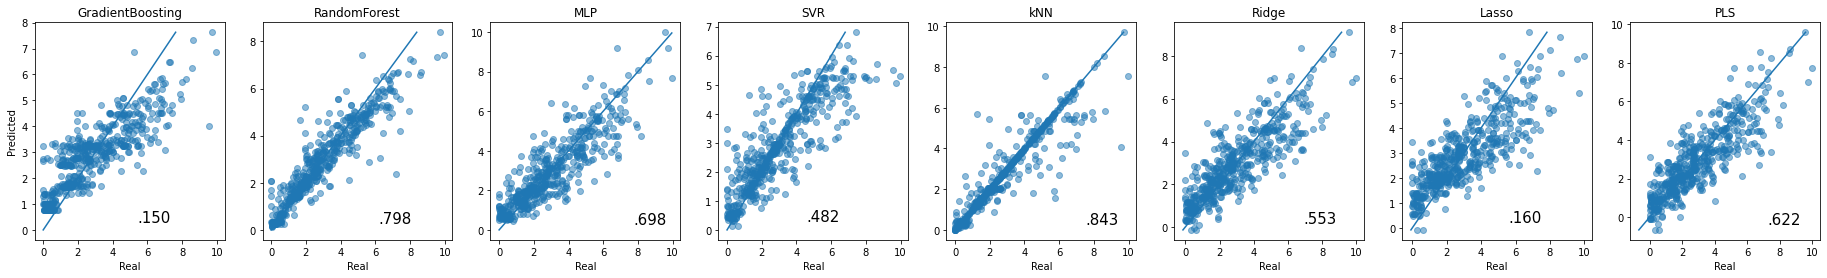

ECFP4


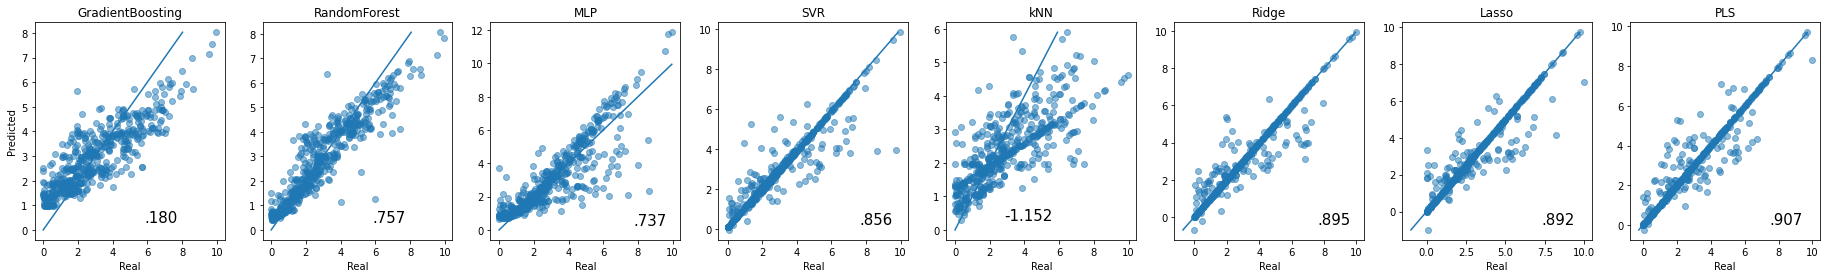

FCFP4


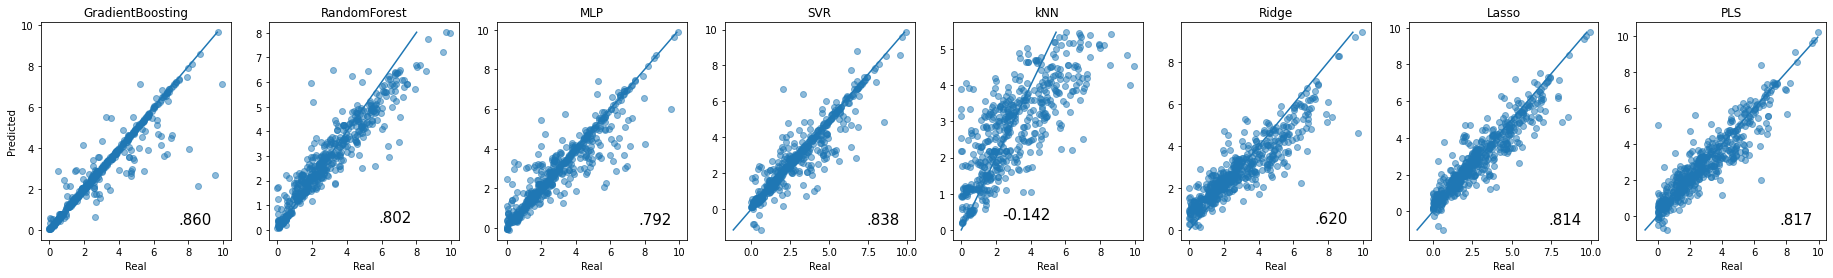

ECFP6


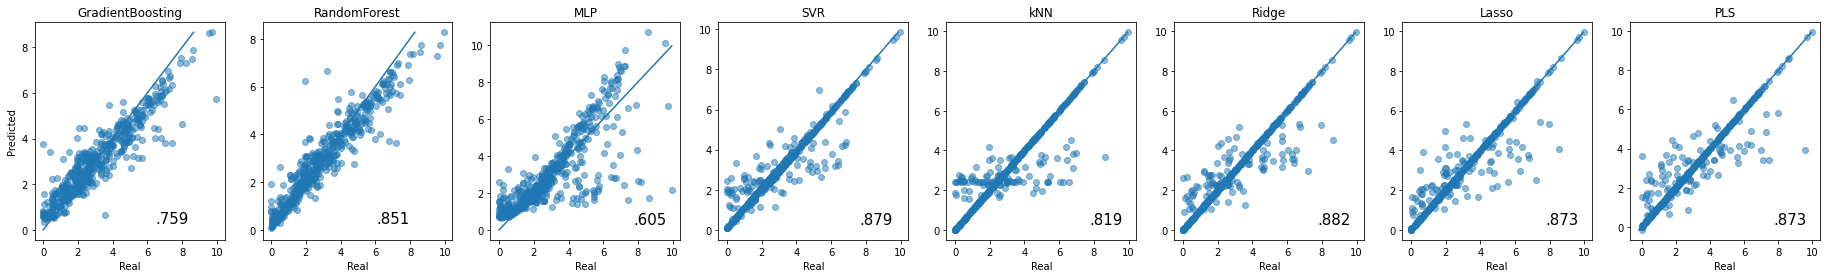

FCFP6


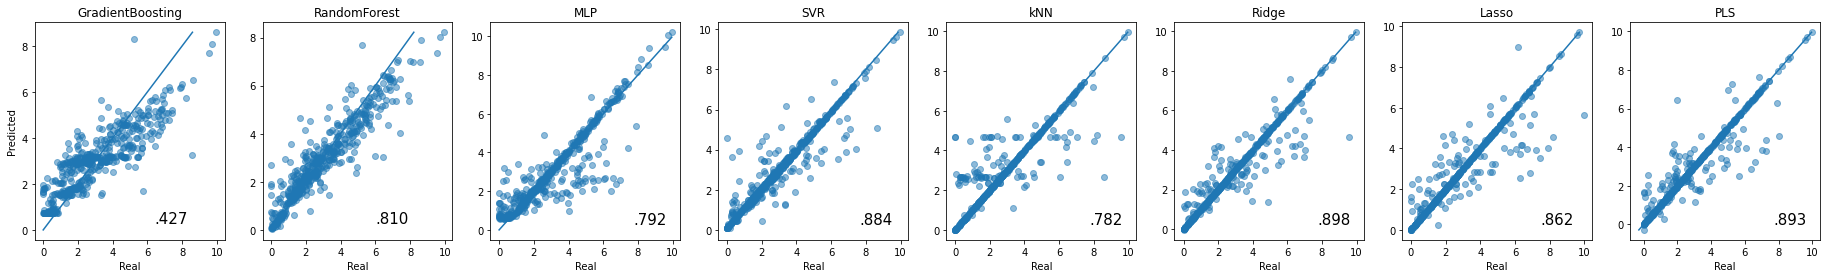

In [ ]:
for X_train1, X_test1, objective1, name in zip(
    [X_train_rdkit1, X_train_mordred1] + X_trains1_selected, 
    [X_test_rdkit1, X_test_mordred1] + X_tests1_selected, 
    [objective1_rdkit, objective1_mordred] + objective1s, 
    ["RDKit descriptors", "Mordred descriptors"] + fingerprinter.names()
    ):
    print(name)
    objective1.set_model_names(model_names)
    all_sklearn.show_allsklearn_metrics(objective1, X_train1, y_train['Dipole moment'])

RDKit descriptors


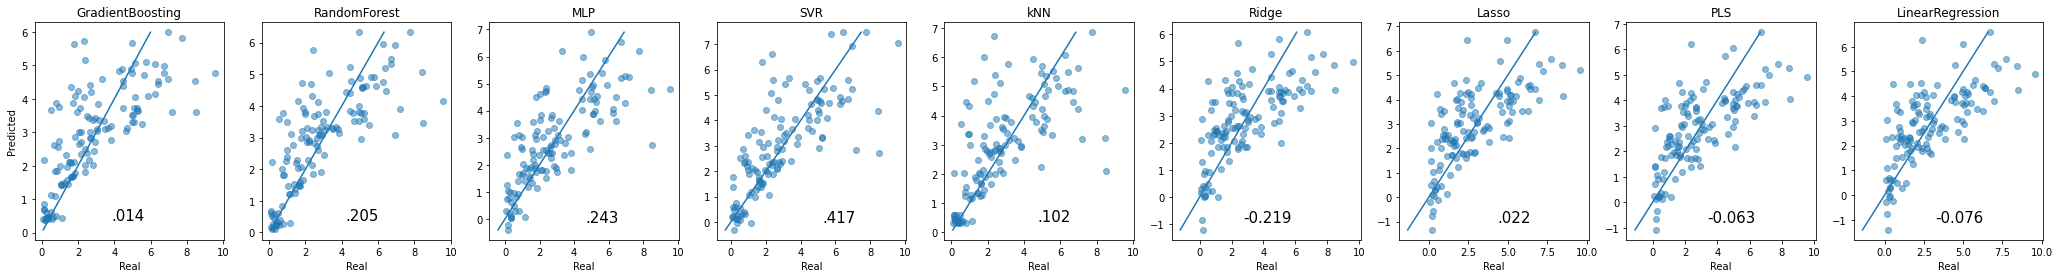

Mordred descriptors


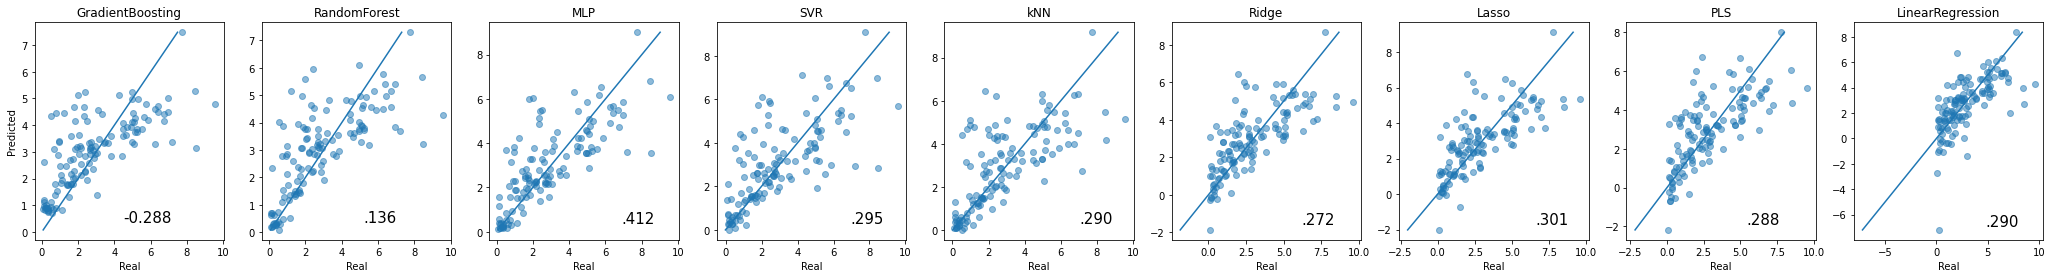

MACCSkeys


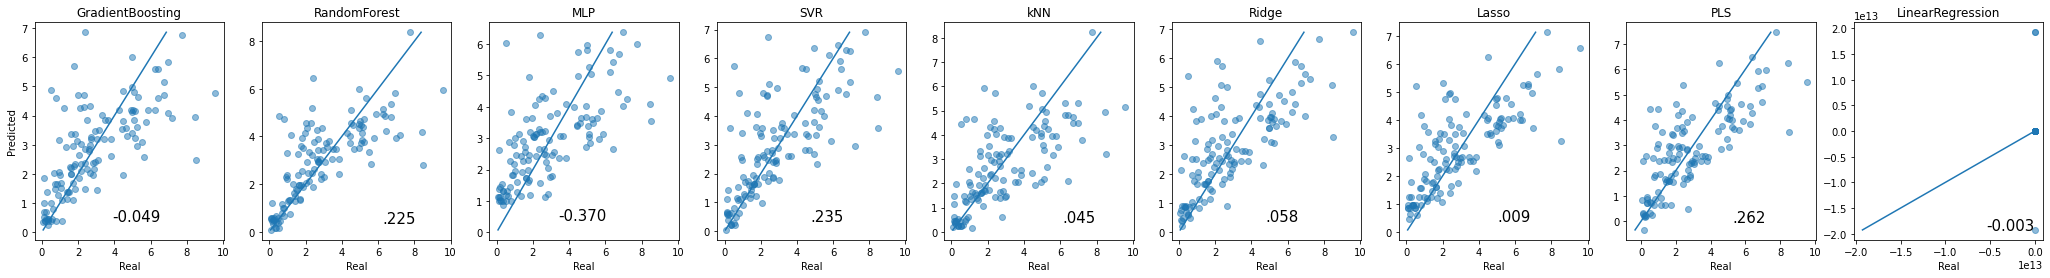

Avalon


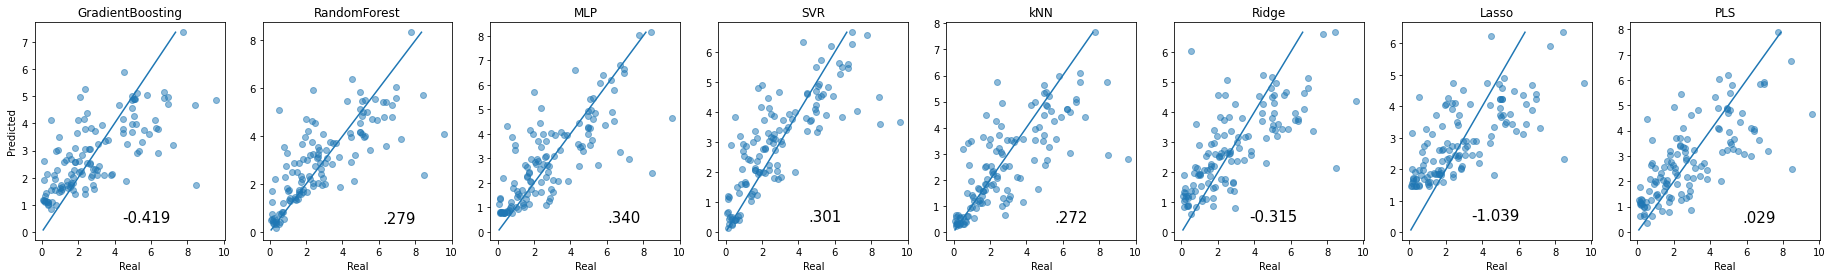

Morgan2(1024bits)


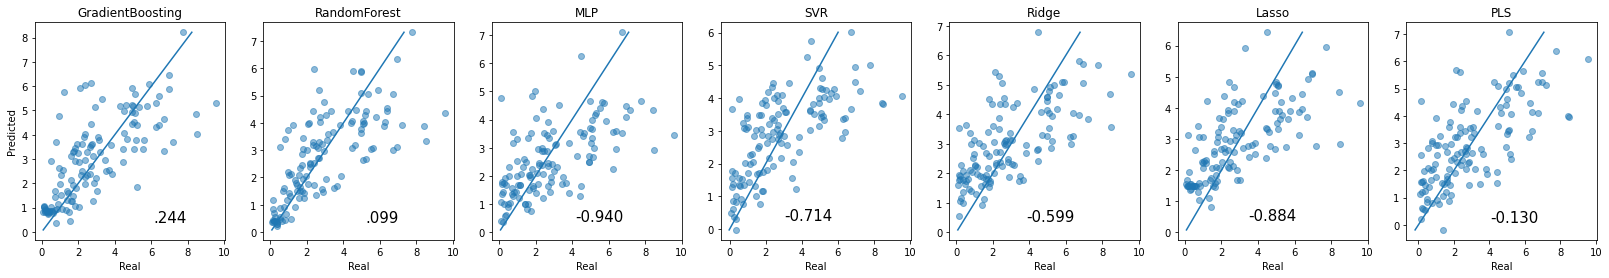

Morgan2F(1024bits)


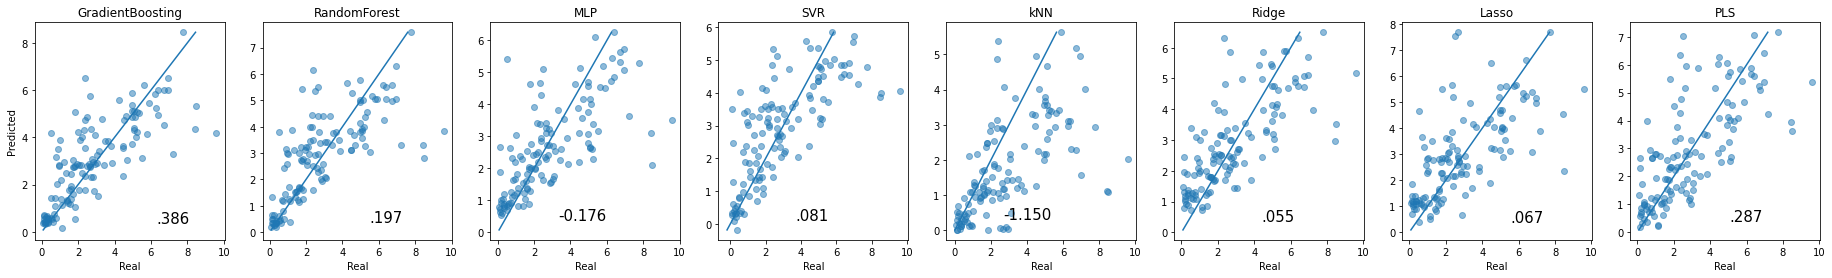

Morgan4(2048bits)


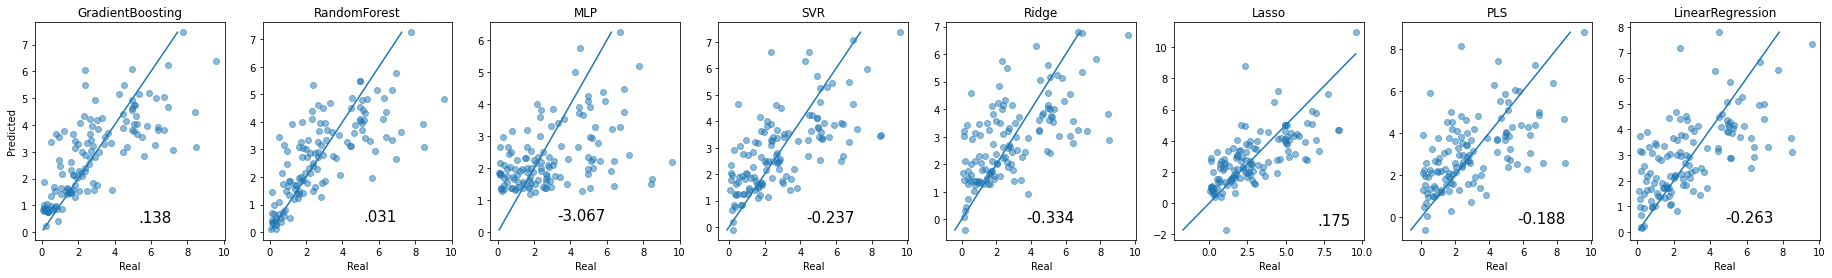

Morgan4F(2048bits)


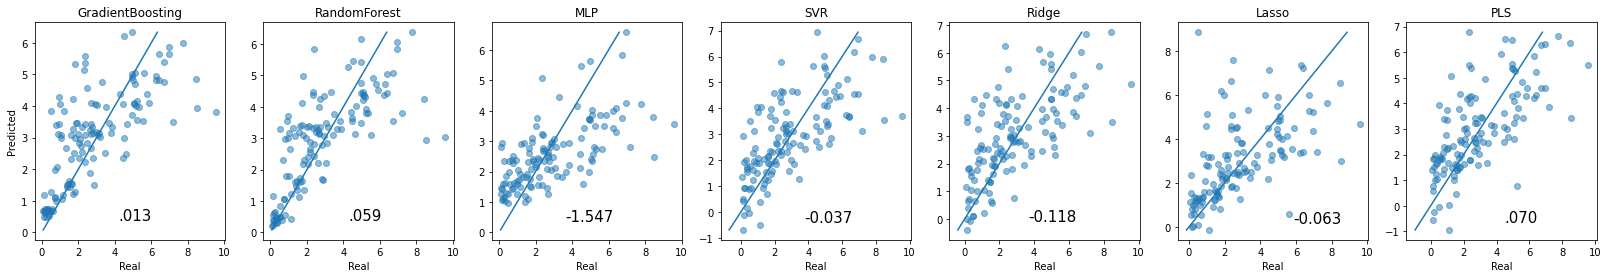

ECFP2


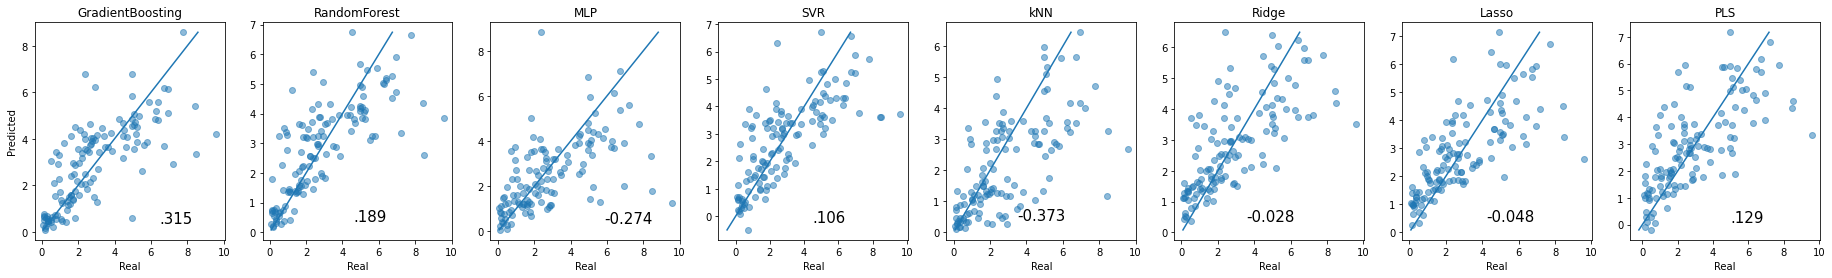

FCFP2


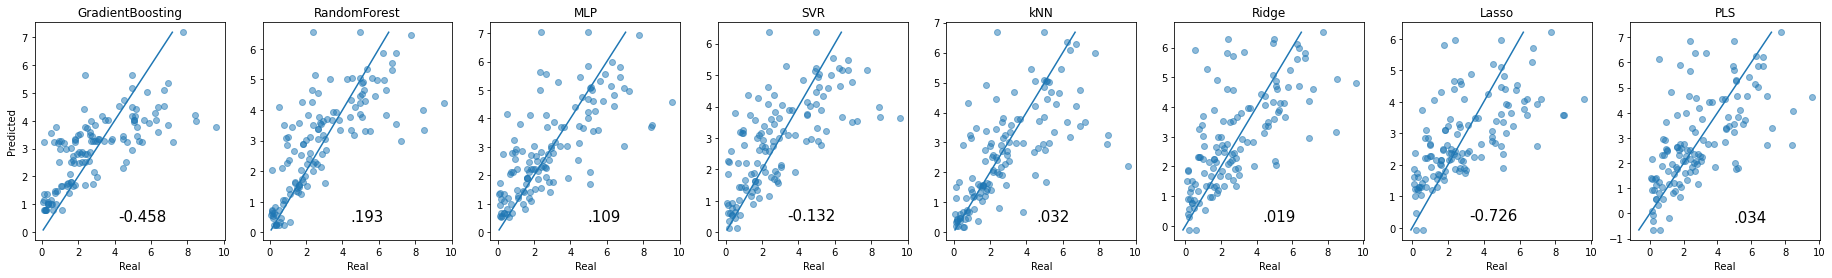

ECFP4


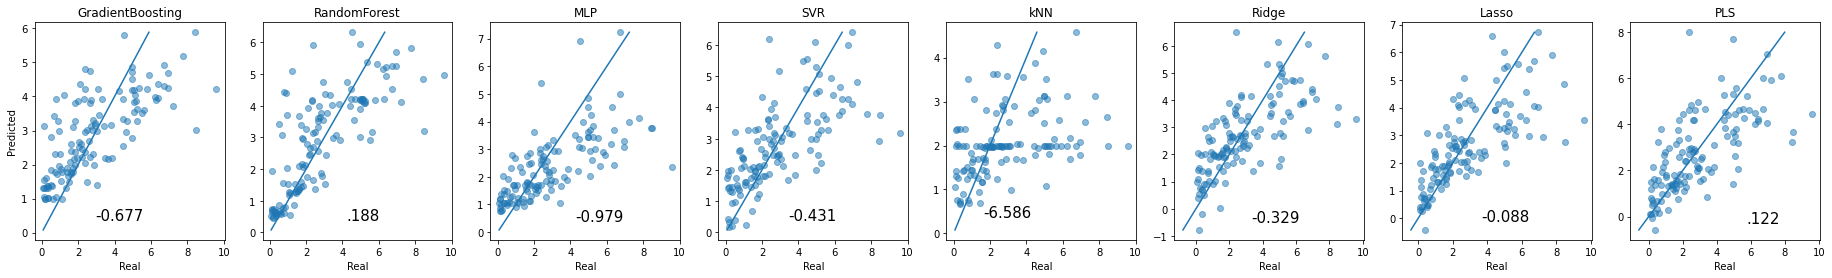

FCFP4


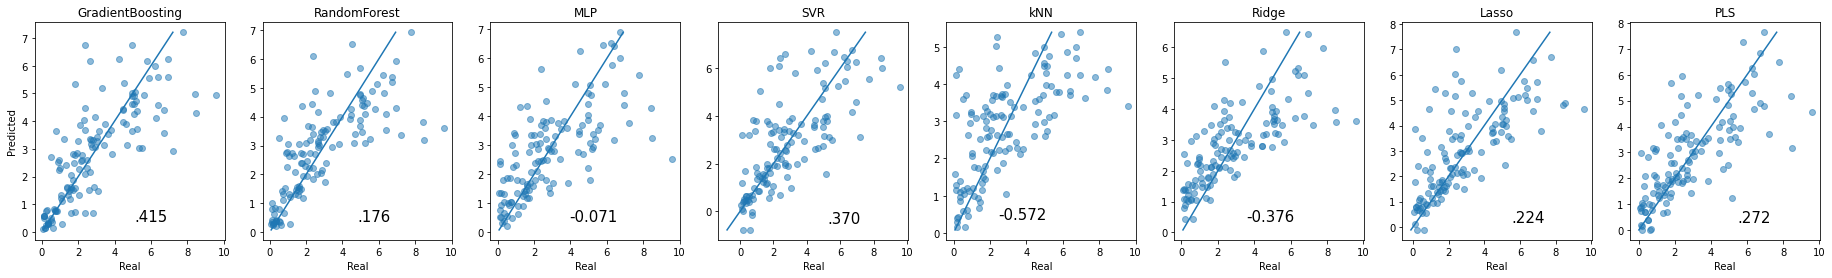

ECFP6


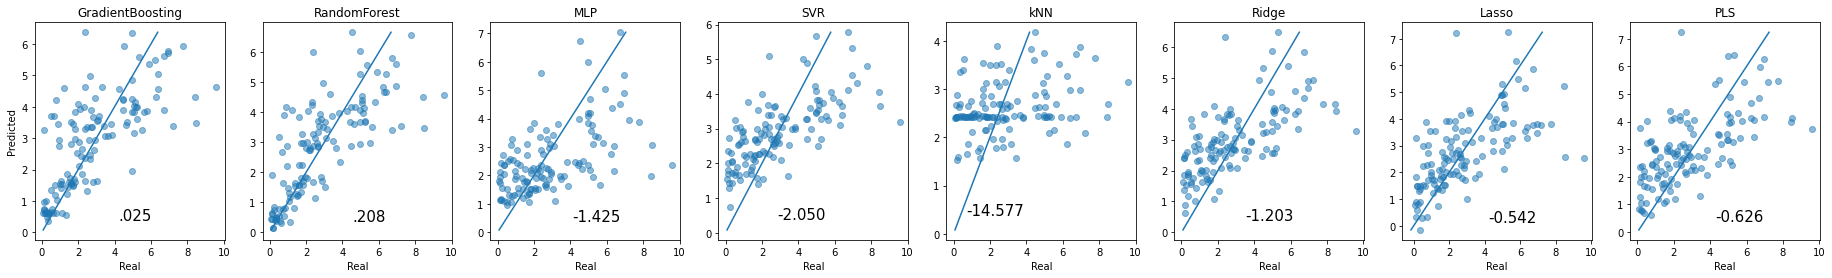

FCFP6


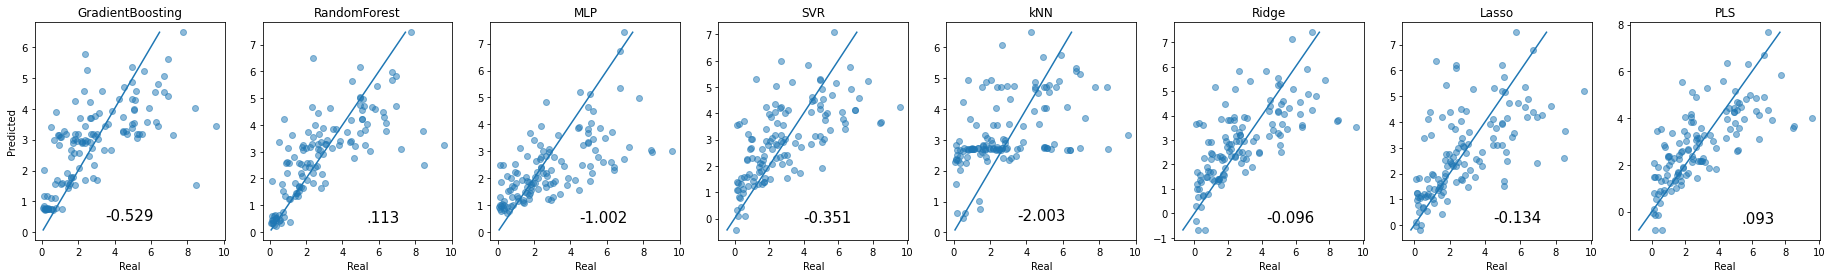

In [ ]:
for X_train1, X_test1, objective1, name in zip(
    [X_train_rdkit1, X_train_mordred1] + X_trains1_selected, 
    [X_test_rdkit1, X_test_mordred1] + X_tests1_selected, 
    [objective1_rdkit, objective1_mordred] + objective1s, 
    ["RDKit descriptors", "Mordred descriptors"] + fingerprinter.names()
    ):
    print(name)
    objective1.set_model_names(model_names)
    all_sklearn.show_allsklearn_metrics(objective1, X_test1, y_test['Dipole moment'])

In [ ]:
!date

Thu Feb 18 03:45:30 UTC 2021


In [ ]:
stacking_model1s = []

names4barh = []
scores4barh = []
for X_train1, X_test1, objective1, name, pcaumap1 in zip(
    [X_train_rdkit1, X_train_mordred1] + X_trains1_selected, 
    [X_test_rdkit1, X_test_mordred1] + X_tests1_selected, 
    [objective1_rdkit, objective1_mordred] + objective1s, 
    ["RDKit descriptors", "Mordred descriptors"] + fingerprinter.names(), 
    pcaumap1s
    ):

    stacking_model1 = all_sklearn.stacking(objective1)
    stacking_model1.fit(X_train1, y_train['Dipole moment'])
    score = stacking_model1.score(X_test1, y_test['Dipole moment'])
    print(name, X_train1.shape, score)
    names4barh.append(name)
    scores4barh.append(score)
    stacking_model1s.append(stacking_model1)

RDKit descriptors (506, 36) 0.5882405027141859
Mordred descriptors (506, 163) 0.5499817076504908
MACCSkeys (506, 132) 0.538690549227959
Avalon (506, 507) 0.5900365922367511
Morgan2(1024bits) (506, 909) 0.5059118713811988
Morgan2F(1024bits) (506, 665) 0.4966118642570044
Morgan4(2048bits) (506, 1656) 0.5521039362832403
Morgan4F(2048bits) (506, 1547) 0.49609725940275085
ECFP2 (506, 503) 0.6329071705234577
FCFP2 (506, 191) 0.4878633633437556


/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 493

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 400

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 397

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 399

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 402

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 400



ECFP4 (506, 2151) 0.5852649758982977
FCFP4 (506, 510) 0.5781511436594146


/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 503

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 403

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 402

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 402

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 403

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 403



ECFP6 (506, 4033) 0.5633732883259293


/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 397

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 398

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 398

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 401

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 401



FCFP6 (506, 2832) 0.5627564413565639


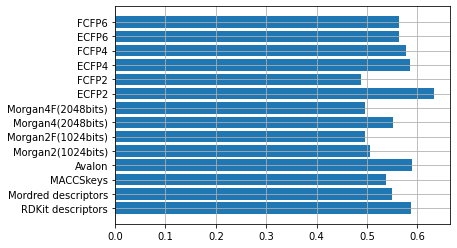

In [ ]:
plt.barh(names4barh, scores4barh)
plt.grid()
plt.show()

(506, 4)
RDKit descriptors best_model SVR(C=0.5136494739686918, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto', kernel='linear', max_iter=530000, shrinking=True, tol=0.001,
    verbose=False)


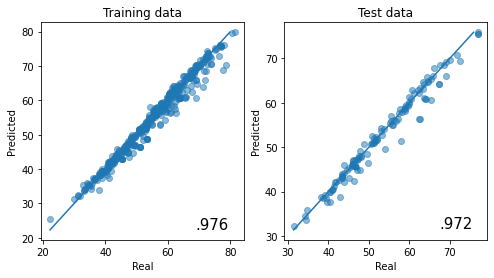

RDKit descriptors stacking_model


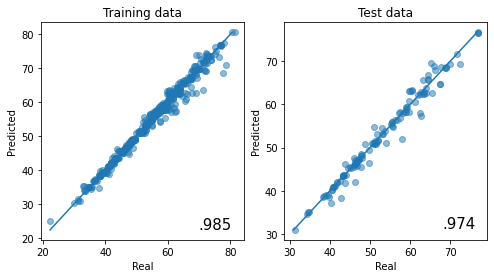

(506, 14)
Mordred descriptors best_model SVR(C=1330.4843867108857, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto', kernel='linear', max_iter=530000, shrinking=True, tol=0.001,
    verbose=False)


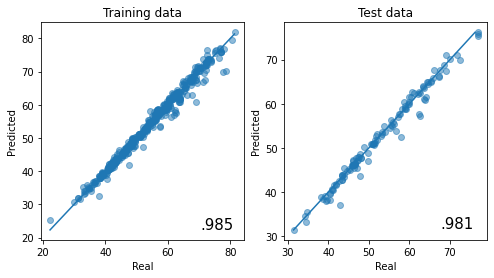

Mordred descriptors stacking_model


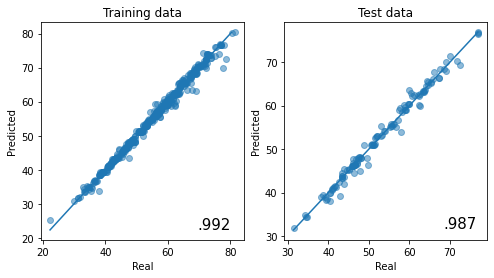

(506, 127)
MACCSkeys best_model SVR(C=5139.47480346437, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='scale', kernel='rbf', max_iter=530000, shrinking=True, tol=0.001,
    verbose=False)


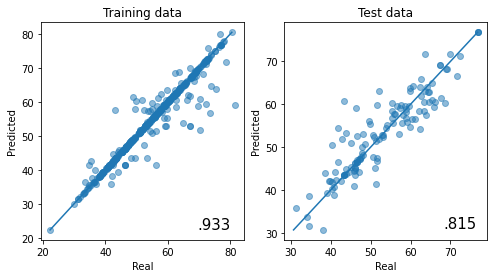

MACCSkeys stacking_model


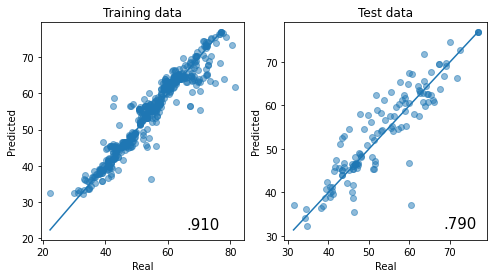

(506, 507)
Avalon best_model SVR(C=14826.801541768642, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto', kernel='rbf', max_iter=530000, shrinking=True, tol=0.001,
    verbose=False)


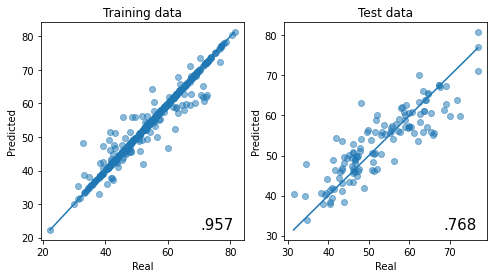

Avalon stacking_model


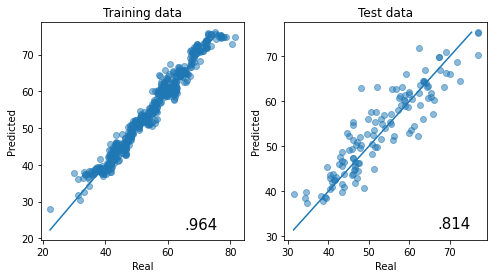

(506, 894)
Morgan2(1024bits) best_model PLSRegression(copy=True, max_iter=530000, n_components=7, scale=True, tol=1e-06)


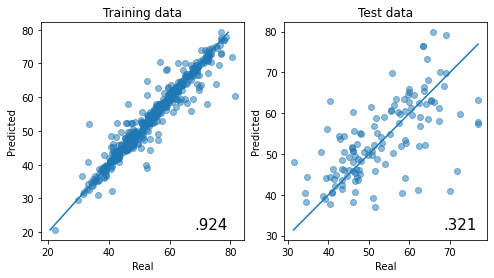

Morgan2(1024bits) stacking_model


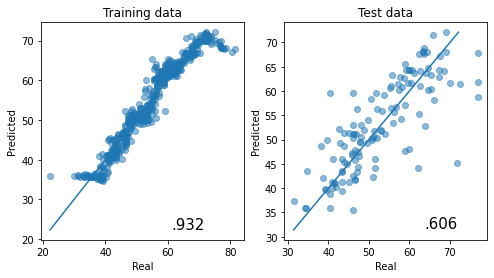

(506, 672)
Morgan2F(1024bits) best_model Lasso(alpha=0.11621833001563134, copy_X=True, fit_intercept=True,
      max_iter=530000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


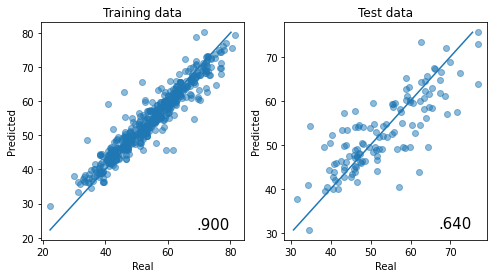

Morgan2F(1024bits) stacking_model


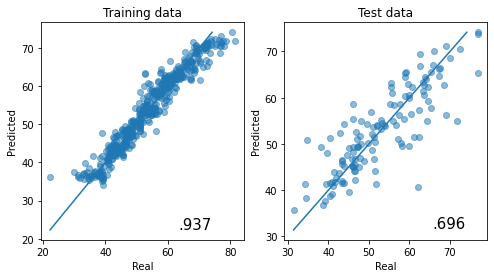

(506, 1686)
Morgan4(2048bits) best_model Ridge(alpha=2.2156602819874984, copy_X=True, fit_intercept=True,
      max_iter=530000, normalize=False, random_state=None, solver='auto',
      tol=0.001)


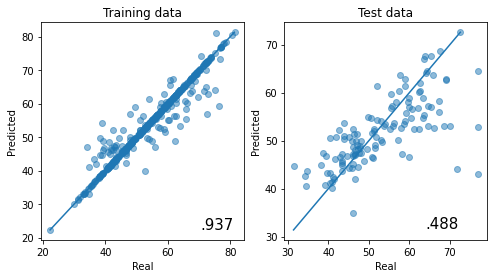

Morgan4(2048bits) stacking_model


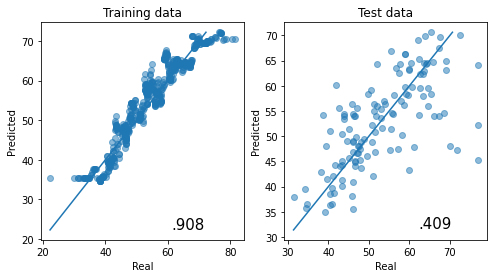

(506, 1684)
Morgan4F(2048bits) best_model PLSRegression(copy=True, max_iter=530000, n_components=1649, scale=True,
              tol=1e-06)


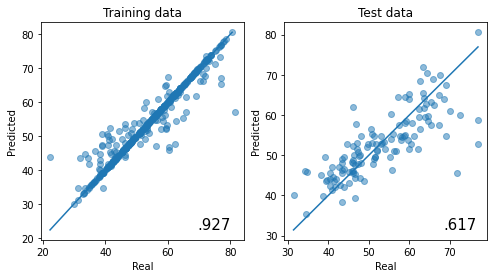

Morgan4F(2048bits) stacking_model


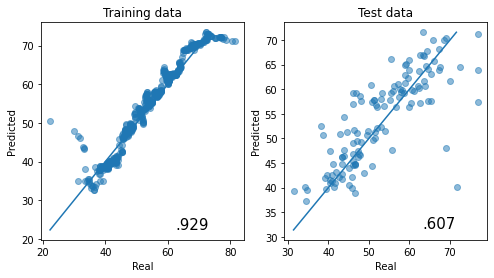

(506, 581)
ECFP2 best_model Lasso(alpha=0.003586440231804421, copy_X=True, fit_intercept=True,
      max_iter=530000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


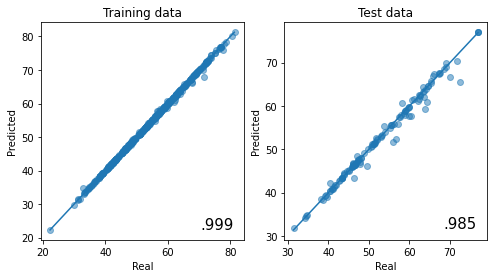

ECFP2 stacking_model


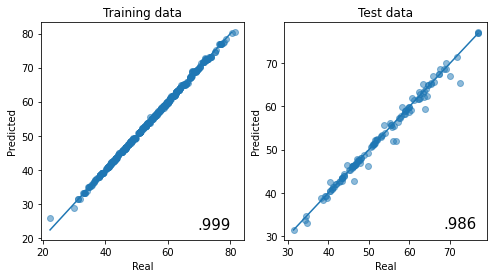

(506, 185)
FCFP2 best_model SVR(C=32.33648104369723, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto', kernel='linear', max_iter=530000, shrinking=True, tol=0.001,
    verbose=False)


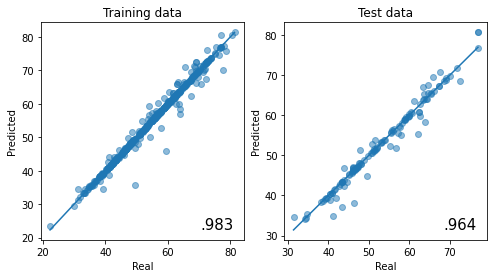

FCFP2 stacking_model


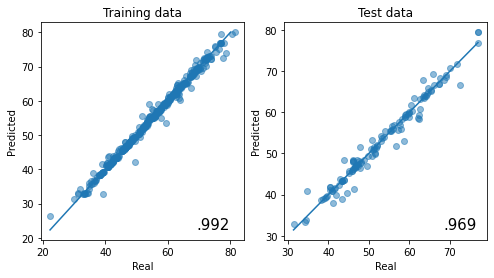

(506, 2142)
ECFP4 best_model Lasso(alpha=0.0007652772080723356, copy_X=True, fit_intercept=True,
      max_iter=530000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


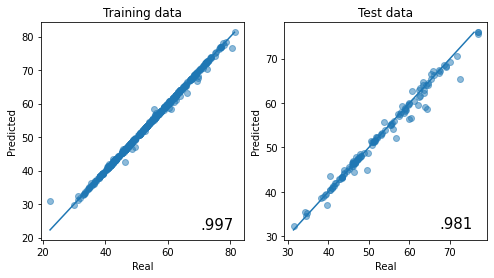

ECFP4 stacking_model


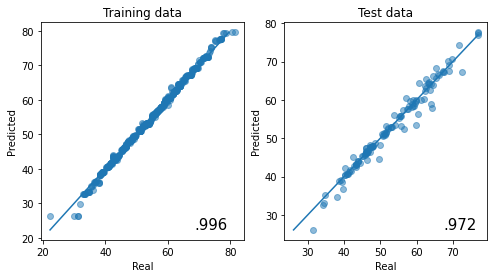

(506, 1111)
FCFP4 best_model Lasso(alpha=0.002095883706365952, copy_X=True, fit_intercept=True,
      max_iter=530000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


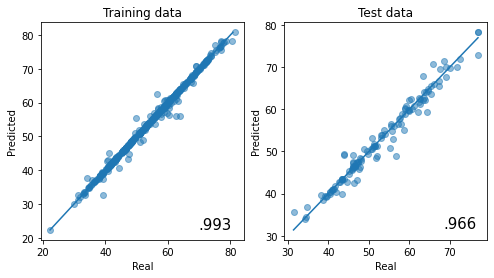

FCFP4 stacking_model


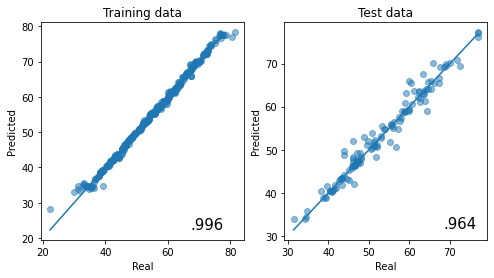

(506, 3587)
ECFP6 best_model Lasso(alpha=0.0024184373887916966, copy_X=True, fit_intercept=True,
      max_iter=530000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


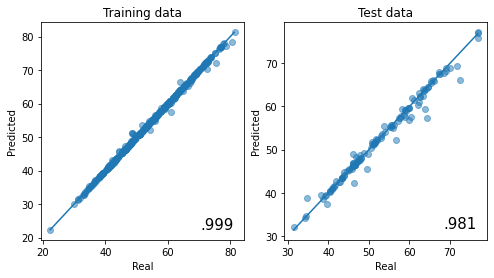

ECFP6 stacking_model


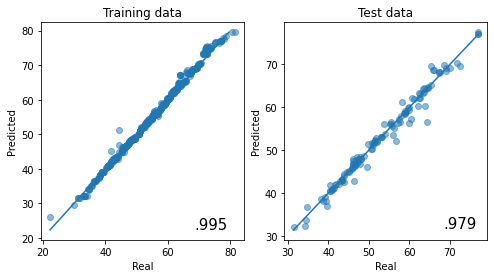

(506, 2606)
FCFP6 best_model Lasso(alpha=0.018129569146284105, copy_X=True, fit_intercept=True,
      max_iter=530000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


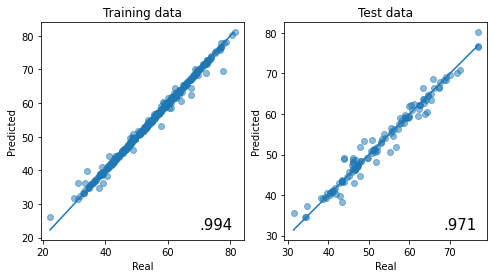

FCFP6 stacking_model


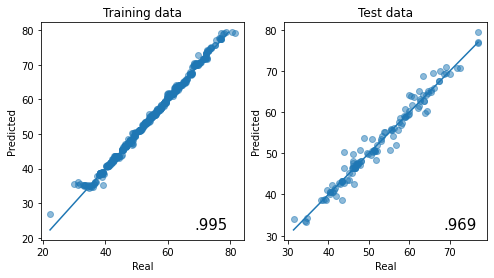

In [ ]:
for X_train1, X_test1, objective1, name, pcaumap1, stacking_model1 in zip(
    [X_train_rdkit1, X_train_mordred1] + X_trains1_selected, 
    [X_test_rdkit1, X_test_mordred1] + X_tests1_selected, 
    [objective1_rdkit, objective1_mordred] + objective1s, 
    ["RDKit descriptors", "Mordred descriptors"] + fingerprinter.names(), 
    pcaumap1s,
    stacking_model1s
    ):
    print(X_train1.shape)
    print(name, "best_model", objective1.best_model.model)
    all_sklearn.show_metrics(objective1.best_model.model, X_train1, X_test1, y_train['Dipole moment'], y_test['Dipole moment'])
    print(name, "stacking_model")
    all_sklearn.show_metrics(stacking_model1, X_train1, X_test1, y_train['Dipole moment'], y_test['Dipole moment'])

In [ ]:
!date

Thu Feb 18 03:58:35 UTC 2021
